In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pymongo
import sys
import json

import os

In [83]:
df=pd.read_csv('Motor_vehicle_insurance_data.csv',sep=';')
for col in df.columns:
    if df[col].isnull().sum()>0:
        print(f"Column {col} has {df[col].isnull().sum()} null values")

Column Date_lapse has 70408 null values
Column Type_fuel has 1764 null values
Column Length has 10329 null values


C:\Users\joshi\AppData\Local\Temp\ipykernel_1572\2482879030.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Motor_vehicle_insurance_data.csv',sep=';')


In [84]:
df['Length']=df['Length'].fillna(df['Length'].mean())
df['Type_fuel']=df['Type_fuel'].fillna(df['Type_fuel'].mode()[0])


In [85]:
df.shape

(105555, 30)

In [87]:
df.head(50)

ID Date_start_contract Date_last_renewal Date_next_renewal  Date_birth  \
0    1          05/11/2015        05/11/2015        05/11/2016  15/04/1956   
1    1          05/11/2015        05/11/2016        05/11/2017  15/04/1956   
2    1          05/11/2015        05/11/2017        05/11/2018  15/04/1956   
3    1          05/11/2015        05/11/2018        05/11/2019  15/04/1956   
4    2          26/09/2017        26/09/2017        26/09/2018  15/04/1956   
5    2          26/09/2017        26/09/2018        26/09/2019  15/04/1956   
6    3          29/11/2013        29/11/2015        29/11/2016  18/03/1975   
7    3          29/11/2013        29/11/2016        29/11/2017  18/03/1975   
8    3          29/11/2013        29/11/2017        29/11/2018  18/03/1975   
9    3          29/11/2013        29/11/2018        29/11/2019  18/03/1975   
10   4          21/10/2016        21/10/2016        21/10/2017  10/07/1973   
11   4          21/10/2016        21/10/2017        21/10/2018  10/07/1973   
12   4          21/10/2016        21/10/2018        21/10/2019  10/07/1973   
13   5          12/05/2017        12/05/2017        12/05/2018  10/07/1973   
14   5          12/05/2017        12/05/2018        12/05/2019  10/07/1973   
15   6          29/05/2006        29/05/2016        29/05/2017  21/10/1966   
16   6          29/05/2006        29/05/2017        29/05/2018  21/10/1966   
17   6          29/05/2006        29/05/2018        29/05/2019  21/10/1966   
18   7          11/02/2015        11/02/2016        11/02/2017  14/05/1946   
19   8          28/05/2001        28/05/2016        28/05/2017  11/05/1941   
20   8          28/05/2001        28/05/2017        28/05/2018  11/05/1941   
21   8          28/05/2001        28/05/2018        28/05/2019  11/05/1941   
22   9          24/10/2013        24/10/2016        24/10/2017  22/10/1949   
23   9          24/10/2013        24/10/2017        24/10/2018  22/10/1949   
24  10          13/01/2017        13/01/2017        13/01/2018  22/10/1949   
25  10          13/01/2017        13/01/2018        13/01/2019  22/10/1949   
26  11          10/05/2017        10/05/2017        10/05/2018  22/10/1949   
27  11          10/05/2017        10/05/2018        10/05/2019  22/10/1949   
28  12          05/04/2016        05/04/2016        05/04/2017  04/06/1946   
29  12          05/04/2016        05/04/2017        05/04/2018  04/06/1946   
30  12          05/04/2016        05/04/2018        05/04/2019  04/06/1946   
31  13          13/05/2016        13/05/2016        13/05/2017  16/02/1951   
32  13          13/05/2016        13/05/2017        13/05/2018  16/02/1951   
33  13          13/05/2016        13/05/2018        13/05/2019  16/02/1951   
34  14          25/09/2015        25/09/2016        25/09/2017  23/06/1951   
35  14          25/09/2015        25/09/2017        25/09/2018  23/06/1951   
36  14          25/09/2015        25/09/2018        25/09/2019  23/06/1951   
37  15          24/07/2015        24/07/2016        24/07/2017  05/09/1945   
38  15          24/07/2015        24/07/2017        24/07/2018  05/09/1945   
39  15          24/07/2015        24/07/2018        24/07/2019  05/09/1945   
40  16          11/03/2004        11/03/2016        11/03/2017  04/11/1954   
41  16          11/03/2004        11/03/2017        11/03/2018  04/11/1954   
42  16          11/03/2004        11/03/2018        11/03/2019  04/11/1954   
43  17          10/08/2009        15/08/2016        15/08/2017  01/01/1958   
44  17          10/08/2009        15/08/2017        15/08/2018  01/01/1958   
45  17          10/08/2009        15/08/2018        15/08/2019  01/01/1958   
46  18          22/02/2005        22/02/2016        22/02/2017  09/09/1941   
47  18          22/02/2005        22/02/2017        22/02/2018  09/09/1941   
48  18          22/02/2005        22/02/2018        22/02/2019  09/09/1941   
49  19          11/01/2018        11/01/2018        11/01/2019  06/01/1943   

   Date_driving_licence D

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105555 entries, 0 to 105554
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    105555 non-null  int64  
 1   Date_start_contract   105555 non-null  object 
 2   Date_last_renewal     105555 non-null  object 
 3   Date_next_renewal     105555 non-null  object 
 4   Date_birth            105555 non-null  object 
 5   Date_driving_licence  105555 non-null  object 
 6   Distribution_channel  105555 non-null  object 
 7   Seniority             105555 non-null  int64  
 8   Policies_in_force     105555 non-null  int64  
 9   Max_policies          105555 non-null  int64  
 10  Max_products          105555 non-null  int64  
 11  Lapse                 105555 non-null  int64  
 12  Date_lapse            35147 non-null   object 
 13  Payment               105555 non-null  int64  
 14  Premium               105555 non-null  float64
 15  

In [7]:
df[['Premium',
 'Seniority',
 'Policies_in_force',
 'Max_policies',
 'Max_products',
 'Lapse',
 'Payment',
 'N_claims_year',
 'N_claims_history',
 'Type_risk',
 'Area',
 'Second_driver',
 'Year_matriculation',
 'Power',
 'Cylinder_capacity',
 'N_doors',
 'Weight']].corr()

Premium  Seniority  Policies_in_force  Max_policies  \
Premium             1.000000  -0.069821          -0.092465     -0.077578   
Seniority          -0.069821   1.000000           0.048138      0.248679   
Policies_in_force  -0.092465   0.048138           1.000000      0.790420   
Max_policies       -0.077578   0.248679           0.790420      1.000000   
Max_products       -0.090041   0.232416           0.162403      0.322403   
Lapse               0.055217  -0.058257           0.198977      0.178897   
Payment             0.249236  -0.163989           0.020921     -0.001041   
N_claims_year       0.092688  -0.043957           0.176735      0.158704   
N_claims_history    0.117130   0.430183           0.233066      0.403990   
Type_risk           0.279959   0.016395          -0.109220     -0.108234   
Area                0.060963  -0.004360          -0.038973     -0.028996   
Second_driver       0.143470  -0.076370           0.048972      0.022671   
Year_matriculation  0.307960  -0.124213          -0.137361     -0.131843   
Power               0.431741  -0.058818          -0.058308     -0.043111   
Cylinder_capacity   0.277018   0.017164          -0.014222      0.000429   
N_doors             0.341438  -0.034382          -0.107895     -0.102973   
Weight              0.298807   0.026745          -0.015870     -0.001553   

                    Max_products     Lapse   Payment  N_claims_year  \
Premium                -0.090041  0.055217  0.249236       0.092688   
Seniority               0.232416 -0.058257 -0.163989      -0.043957   
Policies_in_force       0.162403  0.198977  0.020921       0.176735   
Max_policies            0.322403  0.178897 -0.001041       0.158704   
Max_products            1.000000  0.025435 -0.055648      -0.000132   
Lapse                   0.025435  1.000000  0.068861      -0.011383   
Payment                -0.055648  0.068861  1.000000       0.111551   
N_claims_year          -0.000132 -0.011383  0.111551       1.000000   
N_claims_history        0.167000  0.086604  0.045726       0.392514   
Type_risk              -0.166024 -0.013483  0.148835       0.022593   
Area                    0.029384  0.032560  0.032866       0.032624   
Second_driver          -0.027481 -0.014964  0.052229       0.032343   
Year_matriculation     -0.160210 -0.097535  0.044399       0.001116   
Power                  -0.150711 -0.008677  0.142229       0.063777   
Cylinder_capacity      -0.112704  0.025658  0.122900       0.081607   
N_doors                -0.176379 -0.031179  0.158857       0.050852   
Weight                 -0.115366 -0.000540  0.116353       0.072789   

                    N_claims_history  Type_risk      Area  Second_driver  \
Premium                     0.117130   0.279959  0.060963       0.143470   
Seniority                   0.430183   0.016395 -0.004360      -0.076370   
Policies_in_force           0.233066  -0.109220 -0.038973       0.048972   
Max_policies                0.403990  -0.108234 -0.028996       0.022671   
Max_products                0.167000  -0.166024  0.029384      -0.027481   
Lapse                       0.086604  -0.013483  0.032560      -0.014964   
Payment                     0.045726   0.148835  0.032866       0.052229   
N_claims_year               0.392514   0.022593  0.032624       0.032343   
N_claims_history            1.000000   0.031386  0.053519      -0.017038   
Type_risk                   0.031386   1.000000 -0.026711       0.134113   
Area                        0.053519  -0.026711  1.000000      -0.009131   
Second_driver              -0.017038   0.134113 -0.009131       1.000000   
Year_matriculation         -0.025390   0.131029  0.005819       0.060993   
Power                       0.078483   0.495786 -0.024858       0.049123   
Cylinder_capacity           0.095709   0.504416 -0.047314       0.010744   
N_doors                     0.060078   0.627970 -0.037237       0.107655   
Weight                      0.089231   0.520523 -0.042681       0.017330   

    

In [8]:
data=df.to_dict(orient='records')
DB_NAME = "VehicleInsurance"
COLLECTION_NAME = "Proj1-Data"
CONNECTION_URL = "mongodb+srv://joshisparsh:url"

# above, either remove your credentials or delete the mongoDB resource bofore pushing it to github.

In [9]:
client = pymongo.MongoClient(CONNECTION_URL)
data_base = client[DB_NAME]
collection = data_base[COLLECTION_NAME]

ValueError: Port contains non-digit characters. Hint: username and password must be escaped according to RFC 3986, use urllib.parse.quote_plus

In [54]:
from pymongo.errors import AutoReconnect
import time

MAX_RETRIES = 5
RETRY_DELAY = 3
batch_size = 50

for i in range(0, len(data), batch_size):
    batch = data[i:i+batch_size]
    for attempt in range(3):  # Retry max 3 times
        try:
            collection.insert_many(batch)
            print(f"✅ Inserted batch {i//batch_size + 1}")
            time.sleep(0.3)
            break
        except AutoReconnect as e:
            print(f"⚠️ Retry {attempt + 1} for batch {i//batch_size + 1}: {e}")
            time.sleep(2)
        except Exception as e:
            print(f"❌ Failed batch {i//batch_size + 1}: {e}")
            break


NameError: name 'data' is not defined

In [11]:
int_cat=[]
float_cat=[]
object_cat=[]
for col in df.columns:
    if df[col].dtype=='int64':
        int_cat.append(col)
    elif df[col].dtype=='float64':
        float_cat.append(col)
    elif df[col].dtype=='object':
        object_cat.append(col)
        
boolean_cat = []
categorical_cat = []
for col in object_cat:
    # Check if all non-null values are boolean
    if df[col].isin([True, False]).all():
        boolean_cat.append(col)
    else:
        categorical_cat.append(col)
            

In [12]:
int_cat

['ID',
 'Seniority',
 'Policies_in_force',
 'Max_policies',
 'Max_products',
 'Lapse',
 'Payment',
 'N_claims_year',
 'N_claims_history',
 'Type_risk',
 'Area',
 'Second_driver',
 'Year_matriculation',
 'Power',
 'Cylinder_capacity',
 'N_doors',
 'Weight']

In [13]:
float_cat

['Premium', 'Cost_claims_year', 'R_Claims_history', 'Value_vehicle', 'Length']

In [14]:
boolean_cat

[]

In [15]:
categorical_cat  #obj type columns  , including date columns

['Date_start_contract',
 'Date_last_renewal',
 'Date_next_renewal',
 'Date_birth',
 'Date_driving_licence',
 'Distribution_channel',
 'Date_lapse',
 'Type_fuel']

In [16]:
df.columns

Index(['ID', 'Date_start_contract', 'Date_last_renewal', 'Date_next_renewal',
       'Date_birth', 'Date_driving_licence', 'Distribution_channel',
       'Seniority', 'Policies_in_force', 'Max_policies', 'Max_products',
       'Lapse', 'Date_lapse', 'Payment', 'Premium', 'Cost_claims_year',
       'N_claims_year', 'N_claims_history', 'R_Claims_history', 'Type_risk',
       'Area', 'Second_driver', 'Year_matriculation', 'Power',
       'Cylinder_capacity', 'Value_vehicle', 'N_doors', 'Type_fuel', 'Length',
       'Weight'],
      dtype='object')

In [17]:
count=0
for entry in df['Cost_claims_year']:
    if entry==0:
       count+=1
print(f"Number of zero entries in Cost_claims_year: {count}") 
print(f"Percentage of zero entries in Cost_claims_year: {count/len(df)*100:.2f}%")  
df['Cost_claims_year'].describe()

Number of zero entries in Cost_claims_year: 85909
Percentage of zero entries in Cost_claims_year: 81.39%


count    105555.000000
mean        153.557305
std        1477.112362
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      260853.240000
Name: Cost_claims_year, dtype: float64

In [18]:
target1=df['Cost_claims_year']
df.drop(columns=['Cost_claims_year','ID','R_Claims_history'],inplace=True)
target2=df['Premium']
df.drop(columns=['Premium'],inplace=True)

In [19]:
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target1, test_size=0.2, random_state=42)
X_train,X_test,y_train2,y_test2=train_test_split(df,target2,test_size=0.2,random_state=42)
# Only apply to numeric columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    if skew(X_train[col]) > 0.5:
        pt = PowerTransformer(method='yeo-johnson')
        X_train[col] = pt.fit_transform(X_train[[col]])
        X_test[col] = pt.transform(X_test[[col]])
        print(f"Applied PowerTransformer to {col} due to skewness: {skew(X_train[col])}")
    else:
        print(f"No transformation needed for {col}, skewness: {skew(X_train[col])}")



Applied PowerTransformer to Seniority due to skewness: 0.05444350831259429
Applied PowerTransformer to Policies_in_force due to skewness: 0.9456679426676924
Applied PowerTransformer to Max_policies due to skewness: 0.2673094288574609
Applied PowerTransformer to Max_products due to skewness: 3.6746648507883903
Applied PowerTransformer to Lapse due to skewness: 1.472717672223253
Applied PowerTransformer to Payment due to skewness: 0.7743166115103546
Applied PowerTransformer to N_claims_year due to skewness: 1.6088909657584936
Applied PowerTransformer to N_claims_history due to skewness: 0.11403836467920073
No transformation needed for Type_risk, skewness: -1.835814002150655
Applied PowerTransformer to Area due to skewness: 1.014344155545996
Applied PowerTransformer to Second_driver due to skewness: 2.2752554790764794
No transformation needed for Year_matriculation, skewness: -1.4255839830468513
No transformation needed for Power, skewness: 0.39582614580794234
No transformation needed for

In [21]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (84444, 26)
X_test shape: (21111, 26)


In [22]:
y_train = np.log1p(y_train)

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
def feature_engineering(df):
    """
    Perform feature engineering on the DataFrame.
    """
    today = datetime(2020, 1, 1)
    
    df['Date_start_contract'] = pd.to_datetime(df['Date_start_contract'], dayfirst=True, errors='coerce')
    df['Date_last_renewal'] = pd.to_datetime(df['Date_last_renewal'], dayfirst=True, errors='coerce')
    df['Date_next_renewal'] = pd.to_datetime(df['Date_next_renewal'], dayfirst=True, errors='coerce')
    df['Date_birth'] = pd.to_datetime(df['Date_birth'], dayfirst=True, errors='coerce')
    df['Date_driving_licence'] = pd.to_datetime(df['Date_driving_licence'], dayfirst=True, errors='coerce')
    df['Date_lapse'] = pd.to_datetime(df['Date_lapse'], dayfirst=True, errors='coerce')

    # Clean up dates
    df['Date_lapse'] = df['Date_lapse'].fillna(today)
    df['Date_lapse'] = df['Date_lapse'].mask(df['Date_lapse'] > today, today)

    # Derived time features
    df['Insurance_status'] = df['Date_lapse'].notna().astype(int)
    df['Age'] = ((today - df['Date_birth']).dt.days // 365).astype('Int64')
    df['Licence_age'] = ((today - df['Date_driving_licence']).dt.days // 365).astype('Int64')
    df['Vehicle_age'] = today.year - df['Year_matriculation']
    df['Insurance_duration'] = ((df['Date_lapse'] - df['Date_start_contract']).dt.days // 30).astype('Int64')

    # Sort for lag feature engineering
    df = df.sort_values(['ID', 'Date_last_renewal'])

    # Lag features (for historical trends per policyholder)
    df['Previous_Premium'] = df.groupby('ID')['Premium'].shift(1)
    df['Previous_Claims'] = df.groupby('ID')['N_claims_year'].shift(1)
    df['Claims_2Y_Sum'] = df.groupby('ID')['N_claims_year'].rolling(2).sum().shift(1).reset_index(0, drop=True)
    df['Premium_Change'] = df['Premium'] - df['Previous_Premium']
    df['Claims_Trend'] = df['N_claims_year'] - df['Previous_Claims']

    # Fill missing values from shift with 0 or appropriate default
    df['Previous_Premium'] = df['Previous_Premium'].fillna(0)
    df['Previous_Claims'] = df['Previous_Claims'].fillna(0)
    df['Claims_2Y_Sum'] = df['Claims_2Y_Sum'].fillna(0)
    df['Premium_Change'] = df['Premium_Change'].fillna(0)
    df['Claims_Trend'] = df['Claims_Trend'].fillna(0)
    df['']

    # Drop redundant columns
    df = df.drop(columns=[
        'Date_start_contract', 'Date_last_renewal', 'Date_next_renewal',
        'Date_birth', 'Date_driving_licence', 'Date_lapse'
    ], errors='ignore')
    return df
x_train_engineered = feature_engineering(X_train)
x_test_engineered=feature_engineering(X_test)

C:\Users\joshi\AppData\Local\Temp\ipykernel_1572\2270996688.py:12: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date_lapse'] = pd.to_datetime(df['Date_lapse'], errors='coerce')


In [24]:

x_train_engineered.shape

(84444, 25)

In [25]:
x_train_engineered.columns

Index(['Distribution_channel', 'Seniority', 'Policies_in_force',
       'Max_policies', 'Max_products', 'Lapse', 'Payment', 'N_claims_year',
       'N_claims_history', 'Type_risk', 'Area', 'Second_driver',
       'Year_matriculation', 'Power', 'Cylinder_capacity', 'Value_vehicle',
       'N_doors', 'Type_fuel', 'Length', 'Weight', 'Insurance_status', 'Age',
       'Vehicle_age', 'Insurance_duration', 'Licence_age'],
      dtype='object')

In [48]:
x_train_engineered=x_train_engineered.drop(columns=['N_claims_history'])

In [49]:
for cols in x_train_engineered.columns:
    if x_train_engineered[cols].dtype == 'object':
        print(f"Column {cols} is of type object")

Column Distribution_channel is of type object
Column Type_fuel is of type object


In [50]:
x_train_engineered.head()

Distribution_channel  Seniority  Policies_in_force  Max_policies  \
72716                    0   1.372321          -0.636621      1.605094   
95053                    1   0.117199          -0.636621      1.271643   
98446                    1  -0.523140          -0.636621     -0.968268   
41836                    1  -1.821256          -0.636621     -0.968268   
16050                    1  -0.523140           1.470201      1.271643   

       Max_products     Lapse   Payment  N_claims_year  Type_risk      Area  \
72716  4.564057e-14  1.976297 -0.685172      -0.479122          2  1.628432   
95053 -2.959438e-15 -0.505509  1.459488       2.043115          2 -0.614088   
98446 -2.959438e-15 -0.505509  1.459488       2.122085          3  1.628432   
41836 -2.959438e-15 -0.505509 -0.685172      -0.479122          3 -0.614088   
16050 -2.959438e-15 -0.505509  1.459488      -0.479122          3 -0.614088   

       ...  Value_vehicle  N_doors  Type_fuel    Length    Weight  \
72716  ...       0.397134        5          D  1.518043  1.177519   
95053  ...       0.330163        4          D  1.121606  1.068384   
98446  ...       0.192534        3          P  0.176213 -0.090149   
41836  ...      -0.723057        3          D -1.597379 -0.664788   
16050  ...       0.594510        5          D  0.195369  0.197195   

       Insurance_status Age  Vehicle_age  Insurance_duration  Licence_age  
72716                 0   2           12                  36           19  
95053                 1   0           17                  64           28  
98446                 1   0           11                  39           16  
41836                 0   3           19                  11           29  
16050                 1   0           16                  29           41  

[5 rows x 24 columns]

In [51]:
x_test_engineered.head()

Distribution_channel  Seniority  Policies_in_force  Max_policies  \
40515                     1  -0.523140           1.470201      1.271643   
28723                     1  -1.028494           1.470201      0.624821   
62581                     0   0.340416          -0.636621     -0.968268   
103419                    1  -0.160864           1.470201      1.271643   
81627                     0   0.340416          -0.636621     -0.968268   

        Max_products     Lapse   Payment  N_claims_year  N_claims_history  \
40515  -2.959438e-15 -0.505509 -0.685172      -0.479122         -1.179999   
28723  -2.959438e-15 -0.505509 -0.685172      -0.479122         -1.179999   
62581  -2.959438e-15 -0.505509 -0.685172      -0.479122         -0.170896   
103419 -2.959438e-15 -0.505509 -0.685172       2.131826          1.180397   
81627  -2.959438e-15 -0.505509 -0.685172      -0.479122         -0.170896   

        Type_risk  ...  Value_vehicle  N_doors  Type_fuel    Length    Weight  \
40515           3  ...       0.773724        5          D  0.886165  0.454309   
28723           3  ...       0.729416        5          P  1.286601  0.528947   
62581           3  ...       0.681795        5          D -0.207447  0.164918   
103419          3  ...       0.395042        4          D  1.286601  0.658670   
81627           3  ...       0.353555        4          P  0.947099  0.141227   

        Insurance_status  Age Vehicle_age  Insurance_duration  Licence_age  
40515                  0    1           4                  32           12  
28723                  1    0          16                  30           27  
62581                  1    0          18                  74           24  
103419                 0    0          19                  44           27  
81627                  1    0          11                  77           47  

[5 rows x 25 columns]

In [52]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Only include columns that exist in x_train_engineered
categorical_cat = ['Distribution_channel', 'Type_fuel']

# Convert categorical columns to string type to avoid dtype issues
x_train_engineered[categorical_cat] = x_train_engineered[categorical_cat].astype(str)

encoder = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(sparse_output=False, drop=None,handle_unknown='ignore'), categorical_cat)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)
# Now you can check dtypes

x_train_encoded = encoder.fit_transform(x_train_engineered)
x_test_encoded=encoder.transform(x_test_engineered)
# Convert encoded NumPy array to DataFrame
feature_names = encoder.get_feature_names_out()


In [53]:
x_train_encoded_df = pd.DataFrame(x_train_encoded, columns=feature_names)
x_test_encoded_df = pd.DataFrame(x_test_encoded, columns=feature_names)
# Check for object-type columns
for col in x_train_encoded_df.columns:
    if x_train_encoded_df[col].dtype == 'object':
        print(f"Column {col} is of type object")
# Fit and transform the training data
x_train_encoded_df

Distribution_channel_0  Distribution_channel_00/01/1900  \
0                         1.0                              0.0   
1                         0.0                              0.0   
2                         0.0                              0.0   
3                         0.0                              0.0   
4                         0.0                              0.0   
...                       ...                              ...   
84439                     1.0                              0.0   
84440                     0.0                              0.0   
84441                     0.0                              0.0   
84442                     1.0                              0.0   
84443                     1.0                              0.0   

       Distribution_channel_1  Type_fuel_D  Type_fuel_P  Seniority  \
0                         0.0          1.0          0.0   1.372321   
1                         1.0          1.0          0.0   0.117199   
2                         1.0          0.0          1.0  -0.523140   
3                         1.0          1.0          0.0  -1.821256   
4                         1.0          1.0          0.0  -0.523140   
...                       ...          ...          ...        ...   
84439                     0.0          1.0          0.0  -0.160864   
84440                     1.0          1.0          0.0  -0.160864   
84441                     1.0          0.0          1.0  -0.160864   
84442                     0.0          0.0          1.0   0.340416   
84443                     0.0          0.0          1.0   1.658232   

       Policies_in_force  Max_policies  Max_products     Lapse  ...  \
0              -0.636621      1.605094  4.564057e-14  1.976297  ...   
1              -0.636621      1.271643 -2.959438e-15 -0.505509  ...   
2              -0.636621     -0.968268 -2.959438e-15 -0.505509  ...   
3              -0.636621     -0.968268 -2.959438e-15 -0.505509  ...   
4               1.470201      1.271643 -2.959438e-15 -0.505509  ...   
...                  ...           ...           ...       ...  ...   
84439          -0.636621     -0.968268 -2.959438e-15 -0.505509  ...   
84440          -0.636621     -0.968268 -2.959438e-15 -0.505509  ...   
84441          -0.636621      1.271643 -2.959438e-15 -0.505509  ...   
84442          -0.636621      0.624821 -2.959438e-15 -0.505509  ...   
84443           1.470201      0.624821 -2.959438e-15 -0.505509  ...   

       Cylinder_capacity  Value_vehicle  N_doors    Length    Weight  \
0                 1998.0       0.397134      5.0  1.518043  1.177519   
1                 2148.0       0.330163      4.0  1.121606  1.068384   
2                 1598.0       0.192534      3.0  0.176213 -0.090149   
3                 1527.0      -0.723057      3.0 -1.597379 -0.664788   
4                 1590.0       0.594510      5.0  0.195369  0.197195   
...                  ...            ...      ...       ...       ...   
84439             1998.0       1.289626      4.0  0.769947  0.464981   
84440             1686.0      -0.721065      3.0 -1.255782 -0.356188   
84441             1390.0      -0.964481      5.0 -1.262528 -0.356188   
84442             2119.0       0.056972      4.0  0.681962 -0.159690   
84443             1398.0      -0.111169      5.0 -1.145355 -0.351806   

       Insurance_status  Age  Vehicle_age  Insurance_duration  Licence_age  
0                   0.0  2.0         12.0                36.0         19.0  
1                   1.0  0.0         17.0                64.0         28.0  
2                   1.0  0.0         11.0                39.0         16.0  
3                   0.0  3.0         19.0                11.0         29.0  
4                   1.0  0.0         16.0                29.0         41.0  
...                 ...  ...          ...                 ...          ...  
84439               0.0  2.0         16.0                36.0         24.0  
84440               0.0  2.0         19

In [54]:
x_train_encoded

array([[  1.,   0.,   0., ...,  12.,  36.,  19.],
       [  0.,   0.,   1., ...,  17.,  64.,  28.],
       [  0.,   0.,   1., ...,  11.,  39.,  16.],
       ...,
       [  0.,   0.,   1., ...,  21.,  42.,  31.],
       [  1.,   0.,   0., ...,  31.,  48.,  42.],
       [  1.,   0.,   0., ...,  19., 133.,  42.]], shape=(84444, 27))

In [55]:
x_test_encoded_df.head()

Distribution_channel_0  Distribution_channel_00/01/1900  \
0                     0.0                              0.0   
1                     0.0                              0.0   
2                     1.0                              0.0   
3                     0.0                              0.0   
4                     0.0                              0.0   

   Distribution_channel_1  Type_fuel_D  Type_fuel_P  Seniority  \
0                     1.0          1.0          0.0  -0.523140   
1                     1.0          0.0          1.0  -1.028494   
2                     0.0          1.0          0.0   0.340416   
3                     0.0          1.0          0.0  -0.160864   
4                     0.0          0.0          1.0   0.340416   

   Policies_in_force  Max_policies  Max_products     Lapse  ...  \
0           1.470201      1.271643 -2.959438e-15 -0.505509  ...   
1           1.470201      0.624821 -2.959438e-15 -0.505509  ...   
2          -0.636621     -0.968268 -2.959438e-15 -0.505509  ...   
3           1.470201      1.271643 -2.959438e-15 -0.505509  ...   
4          -0.636621     -0.968268 -2.959438e-15 -0.505509  ...   

   Cylinder_capacity  Value_vehicle  N_doors    Length    Weight  \
0             1598.0       0.773724      5.0  0.886165  0.454309   
1             1998.0       0.729416      5.0  1.286601  0.528947   
2             1896.0       0.681795      5.0 -0.207447  0.164918   
3             1998.0       0.395042      4.0  1.286601  0.658670   
4             1598.0       0.353555      4.0  0.947099  0.141227   

   Insurance_status  Age  Vehicle_age  Insurance_duration  Licence_age  
0               0.0  1.0          4.0                32.0         12.0  
1               1.0  0.0         16.0                30.0         27.0  
2               1.0  0.0         18.0                74.0         24.0  
3               0.0  0.0         19.0                44.0         27.0  
4               1.0  0.0         11.0                77.0         47.0  

[5 rows x 27 columns]

In [56]:
x_test_encoded_df['Seniority']

0       -0.523140
1       -1.028494
2        0.340416
3       -0.160864
4        0.340416
           ...   
21106    0.117199
21107    0.117199
21108    0.818012
21109    0.818012
21110   -1.028494
Name: Seniority, Length: 21111, dtype: float64

In [57]:
from sklearn.preprocessing import StandardScaler
columns_to_scale = [
    'Seniority',
    'Policies_in_force',
    'Max_policies',
    'Max_products',
    'Lapse',
    'Payment',
    'Power',
    'Cylinder_capacity',
    'Value_vehicle',
    'N_doors',
    'Length',
    'Weight',
    'Age',
    'Vehicle_age',
    'Insurance_duration',
    'Licence_age'
]

# Scale each column in training data
for col in columns_to_scale:
    scaler = StandardScaler()
    x_train_encoded_df[col] = scaler.fit_transform(x_train_encoded_df[[col]])
    x_test_encoded_df[col] = scaler.transform(x_test_encoded_df[[col]])


In [58]:
x_train_encoded.shape

(84444, 27)

In [59]:
y_train

72716     0.000000
95053     4.348082
98446     6.371492
41836     0.000000
16050     0.000000
            ...   
54886     0.000000
76820     0.000000
103694    0.000000
860       5.071166
15795     4.156850
Name: Cost_claims_year, Length: 84444, dtype: float64

In [60]:
X_train_new, X_val, y_train_new, y_val = train_test_split(
    x_train_encoded_df, y_train, test_size=0.2, random_state=42
)


In [61]:
X_train_new.head()

Distribution_channel_0  Distribution_channel_00/01/1900  \
81311                     0.0                              0.0   
70733                     1.0                              0.0   
49066                     1.0                              0.0   
40011                     1.0                              0.0   
82095                     0.0                              0.0   

       Distribution_channel_1  Type_fuel_D  Type_fuel_P  Seniority  \
81311                     1.0          1.0          0.0   0.117199   
70733                     0.0          1.0          0.0   1.790099   
49066                     0.0          0.0          1.0   1.042612   
40011                     0.0          0.0          1.0   0.340416   
82095                     1.0          0.0          1.0  -0.160864   

       Policies_in_force  Max_policies  Max_products     Lapse  ...  \
81311          -0.636621     -0.968268     -0.254507  1.976297  ...   
70733          -0.636621      1.605094     -0.254507 -0.505509  ...   
49066          -0.636621      0.624821     -0.254507 -0.505509  ...   
40011           1.801616      2.017740     -0.254507 -0.505509  ...   
82095          -0.636621     -0.968268     -0.254507 -0.505509  ...   

       Cylinder_capacity  Value_vehicle   N_doors    Length    Weight  \
81311           0.112317       0.358297  0.616619  0.068451  0.261656   
70733           0.628372       1.506172  0.616619  1.252123  0.836585   
49066          -0.364043      -0.266253 -0.708227 -1.668333 -0.268684   
40011          -0.039854      -0.338019  0.616619 -0.115161  0.028998   
82095          -1.606215      -1.517646 -2.695496  0.076824 -2.196571   

       Insurance_status       Age  Vehicle_age  Insurance_duration  \
81311               0.0  2.435548    -0.039115           -0.184143   
70733               0.0  1.418148    -0.039115           -0.981061   
49066               0.0  0.400748    -1.514737           -0.423218   
40011               0.0  0.400748     0.108447            0.054932   
82095               1.0 -0.616652    -0.186677            0.015086   

       Licence_age  
81311     1.135801  
70733     0.095406  
49066    -1.345139  
40011    -0.304745  
82095     0.095406  

[5 rows x 27 columns]

In [62]:
count = 0
for entries in y_train_new:
    if entries==0:
        count+=1
print(f"Percentage of zero entries in y_train_new: {count/len(y_train_new)*100:.2f}%")

Percentage of zero entries in y_train_new: 81.33%


In [63]:
count = 0
for entries in y_train:
    if entries==0:
        count+=1
print(f"Percentage of zero entries in y_train_new: {count/len(y_train)*100:.2f}%")

Percentage of zero entries in y_train_new: 81.32%


In [64]:
count=0
for entry in X_train_new['Distribution_channel_00/01/1900']:
    if entry!=0:
        count+=1    
print(f"Number of non-zero entries in Distribution_channel_00/01/1900: {count}")

Number of non-zero entries in Distribution_channel_00/01/1900: 2119


In [65]:
count=0
for entry in X_train_new['Insurance_status']:
    if entry!=0:
        count+=1    
print(f"Number of non-zero entries in insurance_status: {count}")

Number of non-zero entries in insurance_status: 45080


In [66]:
import numpy as np
print("Before SMOTE:", dict(zip(*np.unique(y_train_new, return_counts=True))))

Before SMOTE: {np.float64(0.0): np.int64(54941), np.float64(3.714790835898437): np.int64(2), np.float64(3.716737782242333): np.int64(1), np.float64(3.716980884224811): np.int64(1), np.float64(3.717223927123079): np.int64(2), np.float64(3.732178378509084): np.int64(1), np.float64(3.7369550773454994): np.int64(1), np.float64(3.741471904233107): np.int64(1), np.float64(3.7462045207332055): np.int64(1), np.float64(3.7492687541267204): np.int64(1), np.float64(3.7534960971999087): np.int64(1), np.float64(3.7537304264335525): np.int64(1), np.float64(3.7572387916272794): np.int64(1), np.float64(3.76630335107874): np.int64(1), np.float64(3.7771192429633444): np.int64(1), np.float64(3.7812307151781224): np.int64(1), np.float64(3.787592927049969): np.int64(1), np.float64(3.7887247890836524): np.int64(1), np.float64(3.7891771754293): np.int64(1), np.float64(3.7900813346229034): np.int64(1), np.float64(3.7918872041881655): np.int64(1), np.float64(3.7975096186393853): np.int64(1), np.float64(3.80042

In [71]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score
y_class_train= (y_train_new != 0).astype(int)
# Define pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(criterion='log_loss', random_state=42))
])

# Grid parameters (prefix with step name `clf__`)
param_grid = {
    'clf__min_samples_split': [3, 5],
    'clf__min_samples_leaf': [2, 4],
    'clf__max_depth': [4, 6],
}

# GridSearchCV setup
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=make_scorer(f1_score),
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit on raw data (before SMOTE)
grid.fit(X_train_new, y_class_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('clf',
                                        RandomForestClassifier(criterion='log_loss',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'clf__max_depth': [4, 6],
                         'clf__min_samples_leaf': [2, 4],
                         'clf__min_samples_split': [3, 5]},
             scoring=make_scorer(f1_score, response_method='predict'),
             verbose=2)

In [73]:
print(grid.best_params_)

{'clf__max_depth': 4, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 3}


In [74]:
from sklearn.metrics import classification_report

# Predict on validation set
y_val_pred = grid.best_estimator_.predict(X_val)

# Convert y_val to binary
y_val_class = (y_val != 0).astype(int)

# Classification report
print(classification_report(y_val_class, y_val_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13733
           1       1.00      1.00      1.00      3156

    accuracy                           1.00     16889
   macro avg       1.00      1.00      1.00     16889
weighted avg       1.00      1.00      1.00     16889



In [75]:
# Step 1: Indices where actual value is 0
zero_indices = (y_val_class == 0)

# Step 2: Count of actual zeroes in y_val
num_actual_zeros = zero_indices.sum()

# Step 3: Count of correct predictions (i.e., model also predicted 0)
correct_zero_predictions = (y_val_pred[zero_indices] == 0).sum()

# Step 4: Accuracy on zero values
if num_actual_zeros > 0:
    zero_prediction_accuracy = correct_zero_predictions / num_actual_zeros
else:
    zero_prediction_accuracy = None

# Display
print(f"Total number of zeros in y_val: {num_actual_zeros}")
print(f"Correctly predicted zeros: {correct_zero_predictions}")
if zero_prediction_accuracy is not None:
    print(f"Accuracy on zero predictions: {zero_prediction_accuracy:.2%}")
else:
    print("No zero values in y_val to evaluate.")


Total number of zeros in y_val: 13733
Correctly predicted zeros: 13733
Accuracy on zero predictions: 100.00%


In [76]:
model=grid.best_estimator_
def stage_1(df,model):
    y_pred=model.predict(df)
    return y_pred


In [77]:
y_val_pred=stage_1(X_val,model)

In [ ]:
zero_indices = (y_val_class == 0)

num_actual_zeros = zero_indices.sum()

correct_zero_predictions = (y_val_pred[zero_indices] == 0).sum()

if num_actual_zeros > 0:
    zero_prediction_accuracy = correct_zero_predictions / num_actual_zeros
else:
    zero_prediction_accuracy = None

print(f"Total number of zeros in y_val: {num_actual_zeros}")
print(f"Correctly predicted zeros: {correct_zero_predictions}")
if zero_prediction_accuracy is not None:
    print(f"Accuracy on zero predictions: {zero_prediction_accuracy:.2%}")
else:
    print("No zero values in y_val to evaluate.")

Total number of zeros in y_val: 13733
Correctly predicted zeros: 13733
Accuracy on zero predictions: 100.00%


In [79]:
# i can create an array of zeroes, make another x_train_filtered, where non-zero values are passed to the model, and after prediction, we can add them
# to their indices. For this we also need to keep the track of the indices where the values are non-zero

def stage_2(pred_stage_1, df, model2):
    # Step 1: Get indices where stage 1 predicted a claim
    index_arr = [i for i, val in enumerate(pred_stage_1) if val != 0]
    
    # Step 2: Filter the data for those indices
    filtered_data = df.iloc[index_arr]
    
    # Step 3: Predict claim amount on filtered data
    pred_claims = model2.predict(filtered_data)
    
    # Step 4: Create final prediction array
    final_pred = np.zeros(len(pred_stage_1))
    for idx, pred in zip(index_arr, pred_claims):
        final_pred[idx] = pred
    
    return final_pred


In [ ]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.mixture import GaussianMixture

# Filter training set
train_index_arr = [i for i, val in enumerate(y_train_new) if val != 0]
filtered_x_new = X_train_new.iloc[train_index_arr]
y_train_new_filtered = y_train_new.iloc[train_index_arr]
y_train_new_filtered_log = np.log1p(y_train_new_filtered)

# Filter validation set separately
val_index_arr = [i for i, val in enumerate(y_val) if val != 0]
filtered_x_new_test = X_val.iloc[val_index_arr]
y_test_new_filtered = y_val.iloc[val_index_arr]
y_test_new_filtered_log = np.log1p(y_test_new_filtered)


In [ ]:
import numpy as np
import pandas as pd
import optuna

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

y_train_new = y_train_new.reset_index(drop=True)
X_train_new = X_train_new.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)

# Now create boolean masks
train_mask = y_train_new != 0
val_mask   = y_val       != 0

# Apply masks safely
X_train = X_train_new.loc[train_mask].copy()
y_train = y_train_new.loc[train_mask].copy()

X_val   = X_val.loc[val_mask].copy()
y_val   = y_val.loc[val_mask].copy()
y_train_log = np.log1p(y_train) 

def tune_model(model_class, X, y, model_name):
    """Return the best hyper‑parameter dict for model_class."""
    def objective(trial):
        if model_name == "xgb":
            params = {
                "n_estimators"     : trial.suggest_int( "n_estimators"    , 300, 1500),
                "max_depth"        : trial.suggest_int( "max_depth"       , 4, 10),
                "learning_rate"    : trial.suggest_float("learning_rate"  , 0.005, 0.05, log=True),
                "subsample"        : trial.suggest_float("subsample"      , 0.6, 1.0),
                "colsample_bytree" : trial.suggest_float("colsample_bytree", 0.6, 1.0),
                "reg_alpha"        : trial.suggest_float("reg_alpha"      , 0.0, 5.0),
                "reg_lambda"       : trial.suggest_float("reg_lambda"     , 0.0, 5.0),
                "min_child_weight" : trial.suggest_int( "min_child_weight", 1, 10),
                "random_state"     : 42,
                "n_jobs"           : -1,
            }
        elif model_name == "lgb":
            params = {
                "n_estimators"     : trial.suggest_int( "n_estimators"    , 300, 1500),
                "max_depth"        : trial.suggest_int( "max_depth"       , 4, 10),
                "learning_rate"    : trial.suggest_float("learning_rate"  , 0.005, 0.05, log=True),
                "subsample"        : trial.suggest_float("subsample"      , 0.6, 1.0),
                "colsample_bytree" : trial.suggest_float("colsample_bytree", 0.6, 1.0),
                "reg_alpha"        : trial.suggest_float("reg_alpha"      , 0.0, 5.0),
                "reg_lambda"       : trial.suggest_float("reg_lambda"     , 0.0, 5.0),
                "random_state"     : 42,
                "n_jobs"           : -1,
            }
        else:  # "cat"
            params = {
                "n_estimators" : trial.suggest_int( "n_estimators" , 300, 1000),
                "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
                "depth"        : trial.suggest_int( "depth"        , 4, 10),
                "l2_leaf_reg"  : trial.suggest_float("l2_leaf_reg" , 1.0, 5.0),
                "random_state" : 42,
                "verbose"      : 0,   # silence CatBoost
            }

        model = model_class(**params)
        return cross_val_score(model, X, y, cv=5, scoring="r2", n_jobs=-1).mean()

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=30, timeout=600)

    print(f"{model_name.upper()} best params → {study.best_params}")
    return study.best_params

# ────────────────────────────────────────────────────────────────────────────────
# 4. Hyper‑parameter tuning
# ────────────────────────────────────────────────────────────────────────────────
xgb_best = tune_model(XGBRegressor, X_train, y_train_log, "xgb")
lgb_best = tune_model(LGBMRegressor, X_train, y_train_log, "lgb")
cat_best = tune_model(CatBoostRegressor, X_train, y_train_log, "cat")

# ────────────────────────────────────────────────────────────────────────────────
# 5. Build stacking ensemble *and fit on training data only*
# ────────────────────────────────────────────────────────────────────────────────
stack_model = StackingRegressor(
    estimators=[
        ("xgb", XGBRegressor(**xgb_best)),
        ("lgb", LGBMRegressor(**lgb_best)),
        ("cat", CatBoostRegressor(verbose=0, **cat_best)),
    ],
    final_estimator=Ridge(alpha=1.0, random_state=42),
    n_jobs=-1,
)

stack_model.fit(X_train, y_train_log)
y_pred_log = stack_model.predict(X_val)       # predictions in log space
y_pred     = np.expm1(y_pred_log)             # back‑transform to original scale

# Ground truth is already in original scale
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2   = r2_score(y_val, y_pred)

print("\nFinal evaluation on hold‑out validation set")
print(f"   RMSE : {rmse:.4f}")
print(f"   R²   : {r2:.4f}")
print(f"   y_pred range : {y_pred.min():.2f} – {y_pred.max():.2f}")
print(f"   y_true range : {y_val.min():.2f} – {y_val.max():.2f}")


[I 2025-07-16 02:52:26,395] A new study created in memory with name: no-name-e8cce667-f7b8-4336-b759-bd40e5459ccf
[I 2025-07-16 02:52:32,131] Trial 0 finished with value: 0.08840754776019913 and parameters: {'n_estimators': 863, 'max_depth': 7, 'learning_rate': 0.033107898900707186, 'subsample': 0.9574387147385449, 'colsample_bytree': 0.6300680965276038, 'reg_alpha': 3.797605092719957, 'reg_lambda': 0.10144884127026854, 'min_child_weight': 2}. Best is trial 0 with value: 0.08840754776019913.
[I 2025-07-16 02:52:36,697] Trial 1 finished with value: 0.11075460853737082 and parameters: {'n_estimators': 838, 'max_depth': 6, 'learning_rate': 0.00565822362809479, 'subsample': 0.9882922934900906, 'colsample_bytree': 0.7505181664746513, 'reg_alpha': 4.403214049863633, 'reg_lambda': 4.594920872522175, 'min_child_weight': 1}. Best is trial 1 with value: 0.11075460853737082.
[I 2025-07-16 02:52:40,812] Trial 2 finished with value: 0.09984136531918408 and parameters: {'n_estimators': 1258, 'max_de

✅ XGB best params → {'n_estimators': 983, 'max_depth': 4, 'learning_rate': 0.007148148322300546, 'subsample': 0.884007536602436, 'colsample_bytree': 0.7493208090578508, 'reg_alpha': 1.2559678900721447, 'reg_lambda': 1.0381573067429597, 'min_child_weight': 2}


[I 2025-07-16 02:54:00,554] Trial 0 finished with value: 0.10028514532764313 and parameters: {'n_estimators': 1096, 'max_depth': 10, 'learning_rate': 0.0212172134219627, 'subsample': 0.6925328461391244, 'colsample_bytree': 0.7945622147151592, 'reg_alpha': 2.8095741259032456, 'reg_lambda': 1.303801597043817}. Best is trial 0 with value: 0.10028514532764313.
[I 2025-07-16 02:54:08,042] Trial 1 finished with value: 0.10765914174176372 and parameters: {'n_estimators': 943, 'max_depth': 10, 'learning_rate': 0.01277195061992201, 'subsample': 0.668925742104282, 'colsample_bytree': 0.989696053521201, 'reg_alpha': 4.953914031788203, 'reg_lambda': 0.8528293589498598}. Best is trial 1 with value: 0.10765914174176372.
[I 2025-07-16 02:54:14,534] Trial 2 finished with value: 0.11053714167912654 and parameters: {'n_estimators': 1210, 'max_depth': 5, 'learning_rate': 0.008759363626703072, 'subsample': 0.6352282562432974, 'colsample_bytree': 0.718956365971853, 'reg_alpha': 3.0912302060964887, 'reg_lam

✅ LGB best params → {'n_estimators': 789, 'max_depth': 9, 'learning_rate': 0.006119077632555485, 'subsample': 0.8875762586995442, 'colsample_bytree': 0.658978795762372, 'reg_alpha': 0.9208746444753872, 'reg_lambda': 0.0019730555546293577}


[I 2025-07-16 02:56:19,112] Trial 0 finished with value: 0.11250621714066344 and parameters: {'n_estimators': 502, 'learning_rate': 0.06589045791614363, 'depth': 4, 'l2_leaf_reg': 2.5598286706262026}. Best is trial 0 with value: 0.11250621714066344.
[I 2025-07-16 02:56:22,913] Trial 1 finished with value: 0.11379393055725975 and parameters: {'n_estimators': 575, 'learning_rate': 0.034652277628936114, 'depth': 4, 'l2_leaf_reg': 2.650006954423019}. Best is trial 1 with value: 0.11379393055725975.
[I 2025-07-16 02:56:35,179] Trial 2 finished with value: 0.05379419578485258 and parameters: {'n_estimators': 819, 'learning_rate': 0.08782359324385523, 'depth': 8, 'l2_leaf_reg': 2.266124496634641}. Best is trial 1 with value: 0.11379393055725975.
[I 2025-07-16 02:56:44,441] Trial 3 finished with value: 0.1113671109155708 and parameters: {'n_estimators': 798, 'learning_rate': 0.02812109260015879, 'depth': 7, 'l2_leaf_reg': 4.129922500812341}. Best is trial 1 with value: 0.11379393055725975.
[I 

✅ CAT best params → {'n_estimators': 783, 'learning_rate': 0.020552167385334476, 'depth': 5, 'l2_leaf_reg': 3.2629192872123434}

📊 Final evaluation on hold‑out validation set
   RMSE : 1.2310
   R²   : 0.1146
   y_pred range : 4.59 – 7.42
   y_true range : 3.77 – 12.47


In [302]:
model2=CatBoostRegressor(
    n_estimators=783, learning_rate=0.020552167385334476, depth=5, l2_leaf_reg=3.2629192872123434
)
model2=model2.fit(filtered_x_new,y_train_new_filtered_log)


0:	learn: 0.1900590	total: 4.62ms	remaining: 3.61s
1:	learn: 0.1897194	total: 8.45ms	remaining: 3.3s
2:	learn: 0.1893750	total: 12.6ms	remaining: 3.28s
3:	learn: 0.1890456	total: 15.5ms	remaining: 3.02s
4:	learn: 0.1887378	total: 18.9ms	remaining: 2.94s
5:	learn: 0.1884153	total: 23.8ms	remaining: 3.09s
6:	learn: 0.1881193	total: 27ms	remaining: 2.99s
7:	learn: 0.1878366	total: 29.8ms	remaining: 2.89s
8:	learn: 0.1875591	total: 42.4ms	remaining: 3.65s
9:	learn: 0.1872833	total: 51.9ms	remaining: 4.01s
10:	learn: 0.1870406	total: 55.9ms	remaining: 3.92s
11:	learn: 0.1868104	total: 59.6ms	remaining: 3.83s
12:	learn: 0.1865630	total: 63.4ms	remaining: 3.76s
13:	learn: 0.1863230	total: 70.3ms	remaining: 3.86s
14:	learn: 0.1860887	total: 74.9ms	remaining: 3.84s
15:	learn: 0.1858682	total: 78.1ms	remaining: 3.74s
16:	learn: 0.1856517	total: 81.7ms	remaining: 3.68s
17:	learn: 0.1854521	total: 85.4ms	remaining: 3.63s
18:	learn: 0.1852658	total: 90.6ms	remaining: 3.64s
19:	learn: 0.1850835	tota

In [304]:
count=0
for entry in y_train_new_filtered:
    if entry==0:
        count+=1
print(count)

0


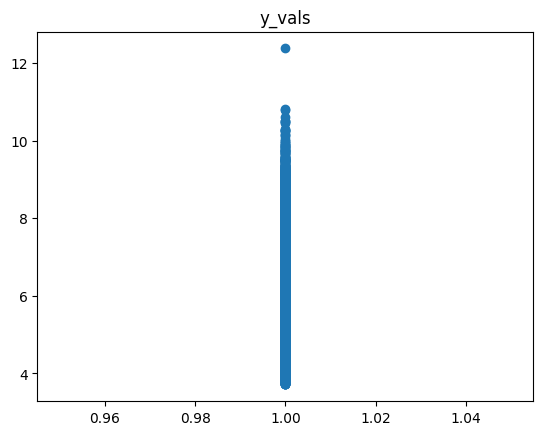

In [305]:
dif_vals=np.unique(y_train_new_filtered)
x_axis=np.ones_like(dif_vals)
plt.scatter(x_axis,dif_vals)
plt.title("y_vals")
plt.show()

C:\Users\joshi\AppData\Local\Temp\ipykernel_24052\4197994115.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_train_new_filtered, shade=True, color='orange')


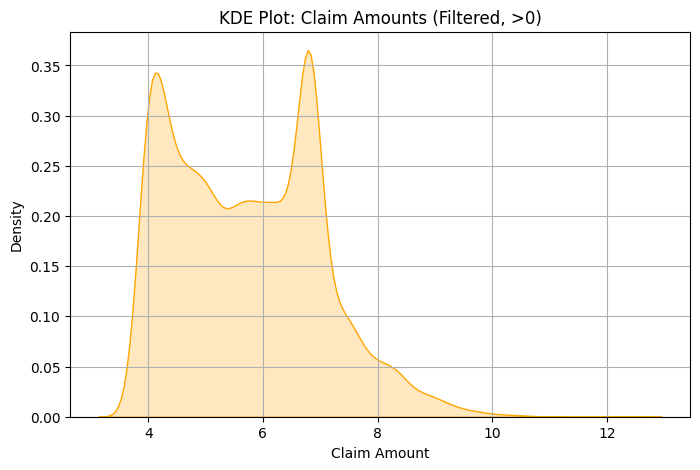

In [306]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.kdeplot(y_train_new_filtered, shade=True, color='orange')
plt.title("KDE Plot: Claim Amounts (Filtered, >0)")
plt.xlabel("Claim Amount")
plt.ylabel("Density")
plt.grid(True)
plt.show()


In [307]:
from scipy.stats import gaussian_kde
import numpy as np
from scipy.signal import find_peaks

data = y_train_new_filtered.values  # convert to np.array if it's a Series
kde = gaussian_kde(data)
x_vals = np.linspace(min(data), max(data), 1000)
density = kde(x_vals)

# Find peaks
peaks, _ = find_peaks(density)

print(f"Number of peaks: {len(peaks)}")


Number of peaks: 3


In [308]:

print(f"Total NaNs in residuals: {filtered_x_new.isna().sum()}")

Total NaNs in residuals: Distribution_channel_0             0
Distribution_channel_00/01/1900    0
Distribution_channel_1             0
Type_fuel_D                        0
Type_fuel_P                        0
Seniority                          0
Policies_in_force                  0
Max_policies                       0
Max_products                       0
Lapse                              0
Payment                            0
Premium                            0
N_claims_year                      0
N_claims_history                   0
Type_risk                          0
Area                               0
Second_driver                      0
Year_matriculation                 0
Power                              0
Cylinder_capacity                  0
Value_vehicle                      0
N_doors                            0
Length                             0
Weight                             0
Insurance_status                   0
Age                                0
Vehicle_age  

In [309]:
def predictions(model, model2, df):
    stage_1_pred=stage_1(X_val,model)
    y_pred=stage_2(stage_1_pred,X_val,model2)
    return y_pred

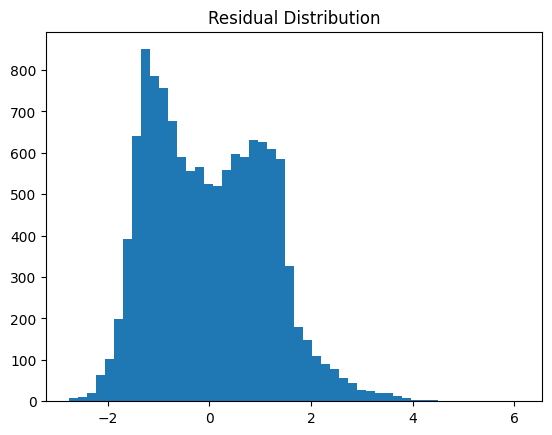

In [310]:
import matplotlib.pyplot as plt
y_pred=model2.predict(filtered_x_new)
residuals = y_train_new_filtered - model2.predict(filtered_x_new)

plt.hist(residuals, bins=50)
plt.title("Residual Distribution")
plt.show()


In [311]:
print(f"Total NaNs in residuals: {residuals.isna().sum()}")
print(f"Total NaNs in y_pred: {np.isnan(y_pred).sum()}")
print(f"Total NaNs in residuals: {y_train_new_filtered.isna().sum()}")

Total NaNs in residuals: 0
Total NaNs in y_pred: 0
Total NaNs in residuals: 0


In [312]:
print(f"Total NaNs in residuals: {residuals.isna().sum()}")

Total NaNs in residuals: 0


In [313]:
from sklearn.mixture import GaussianMixture
import numpy as np
import pandas as pd

# Convert to log-scale for better clustering if distribution is skewed
min_resid = residuals.min()

# Shift if needed
if min_resid <= -1:
    shift = abs(min_resid) + 1.01
    print(f"Shifting residuals by: {shift}")
    residuals_shifted = residuals + shift
else:
    residuals_shifted = residuals

residuals_log = np.log1p(residuals_shifted)

# Fit GMM with 3 clusters (change to 4-5 if needed)
gmm = GaussianMixture(n_components=3, random_state=42)
clusters = gmm.fit_predict(residuals.values.reshape(-1, 1))

# Add cluster labels to dataframe
filtered_x_new_clustered = filtered_x_new.copy()
filtered_x_new_clustered['cluster_trials'] = clusters


Shifting residuals by: 3.780764006830597


In [304]:

def predictions(model, model2,  X_val):
    # Stage 1 predictions
    stage_1_pred = stage_1(X_val, model)

    # Initialize the final predictions list
    final_predictions = []

    for i in range(len(X_val)):
        if stage_1_pred[i] == 0:
            # If stage 1 predicts 0, return 0
            final_predictions.append(0)
        else:
            # For non-zero stage 1 prediction, proceed
            x_sample = X_val.iloc[[i]]  # single row in DataFrame form

            # Stage 2
            y_pred_2 = stage_2(np.array([stage_1_pred[i]]), x_sample, model2)

    return np.array(final_predictions)
y_val_pred=predictions(model, model2, X_val)

In [305]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_predictions(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")
    return rmse, r2

# Provide your true target values here as y_val
rmse, r2 = evaluate_predictions(y_val, y_val_pred)


ValueError: Found input variables with inconsistent numbers of samples: [3156, 0]

In [ ]:
zero_indices = (y_val == 0)

num_actual_zeros = zero_indices.sum()
correct_zero_predictions = (y_val_pred[zero_indices] == 0).sum()

# Step 4: Accuracy on zero values
if num_actual_zeros > 0:
    zero_prediction_accuracy = correct_zero_predictions / num_actual_zeros
else:
    zero_prediction_accuracy = None

print(f"Total number of zeros in y_val: {num_actual_zeros}")
print(f"Correctly predicted zeros: {correct_zero_predictions}")
if zero_prediction_accuracy is not None:
    print(f"Accuracy on zero predictions: {zero_prediction_accuracy:.2%}")
else:
    print("No zero values in y_val to evaluate.")

Total number of zeros in y_val: 13733
Correctly predicted zeros: 13733
Accuracy on zero predictions: 100.00%


In [328]:
y_val_pred=predictions(model, model2, model3, x_test_encoded_df)

In [ ]:
zero_indices = (y_test == 0)

num_actual_zeros = zero_indices.sum()

correct_zero_predictions = (y_val_pred[zero_indices] == 0).sum()

# Step 4: Accuracy on zero values
if num_actual_zeros > 0:
    zero_prediction_accuracy = correct_zero_predictions / num_actual_zeros
else:
    zero_prediction_accuracy = None

print(f"Total number of zeros in y_val: {num_actual_zeros}")
print(f"Correctly predicted zeros: {correct_zero_predictions}")
if zero_prediction_accuracy is not None:
    print(f"Accuracy on zero predictions: {zero_prediction_accuracy:.2%}")
else:
    print("No zero values in y_val to evaluate.")

Total number of zeros in y_val: 17235
Correctly predicted zeros: 17235
Accuracy on zero predictions: 100.00%


In [331]:
y_test=np.log1p(y_test)

In [332]:
rmse, r2 = evaluate_predictions(y_test, y_val_pred)

RMSE: 0.8165
R² Score: 0.8721


C:\Users\joshi\AppData\Local\Temp\ipykernel_18780\643047209.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_train2, shade=True, color='orange')


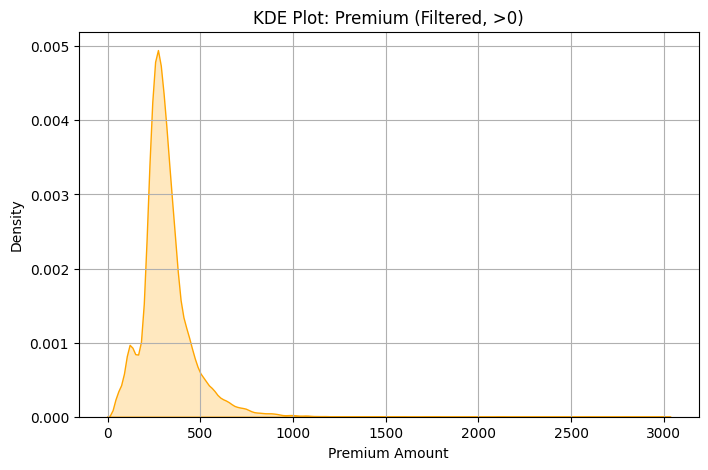

In [80]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.kdeplot(y_train2, shade=True, color='orange')
plt.title("KDE Plot: Premium (Filtered, >0)")
plt.xlabel("Premium Amount")
plt.ylabel("Density")
plt.grid(True)
plt.show()

In [81]:
y_train2=np.log1p(y_train2)

C:\Users\joshi\AppData\Local\Temp\ipykernel_18780\3819392389.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_train2, shade=True, color='orange')


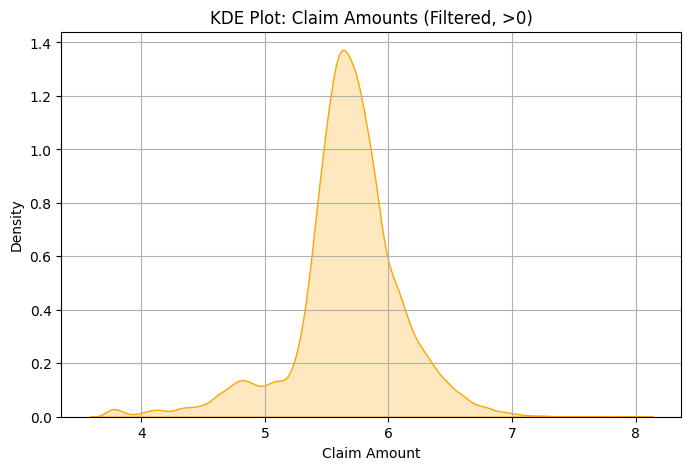

In [82]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.kdeplot(y_train2, shade=True, color='orange')
plt.title("KDE Plot: Claim Amounts (Filtered, >0)")
plt.xlabel("Claim Amount")
plt.ylabel("Density")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import TweedieRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np

def train_tweedie_model(X_train, y_train):
    # Log-transform the target to reduce skew
    y_train_log = np.log1p(y_train)

    # Standardize features manually
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Train the Tweedie Regressor
    model = TweedieRegressor(power=1.5, alpha=0.5, max_iter=1000)
    model.fit(X_train_scaled, y_train_log)

    return model, scaler

from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(model, scaler, X_val, y_val_log):
    # Apply same scaling to validation data
    X_val_scaled = scaler.transform(X_val)

    # Predict log-transformed target
    y_pred_log = model.predict(X_val_scaled)

    # Invert log1p to original scale
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_val_log)

    # Check for invalid values
    if not np.all(np.isfinite(y_pred)) or not np.all(np.isfinite(y_true)):
        raise ValueError("y_pred or y_true contains NaN or inf.")

    # Compute metrics
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

    return y_true, y_pred

y_train_log = np.log1p(y_train_new)
y_val_log = np.log1p(y_val)

# Train
model, scaler = train_tweedie_model(x_train_encoded, y_train2)

# Evaluate
y_true, y_pred = evaluate_model(model, scaler,x_test_encoded, y_test2)
y_pred_log = model.predict(scaler.transform(x_test_encoded))
print("Any NaNs in prediction?", np.isnan(y_pred_log).any())
print("Any infs in prediction?", np.isinf(y_pred_log).any())


Any NaNs in prediction? False
Any infs in prediction? False


In [88]:
y_test2.isnull().sum()

np.int64(0)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import numpy as np

def train_best_xgb_model(X_train, y_train, n_iter=50, cv=3, random_state=42):
    # Log-transform the target
    y_train_log = np.log1p(y_train)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Define base model
    base_model = XGBRegressor(objective='reg:squarederror', random_state=random_state, n_jobs=-1)

    # Define hyperparameter space
    param_dist = {
        'n_estimators': [200],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 5, 8],
    }

    # Randomized search
    search = RandomizedSearchCV(
        base_model,
        param_distributions=param_dist,
        n_iter=n_iter,
        scoring='r2',
        cv=cv,
        verbose=1,
        random_state=random_state,
        n_jobs=-1
    )

    search.fit(X_train_scaled, y_train_log)
    best_model = search.best_estimator_
    print("Best Hyperparameters:", search.best_params_)

    return best_model, scaler


In [ ]:
def evaluate_model(model, scaler, X_val, y_val_log):
    # Scale validation features
    X_val_scaled = scaler.transform(X_val)

    # Predict and invert log1p
    y_pred_log = model.predict(X_val_scaled)
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_val_log)

    # Check for invalids
    if not np.all(np.isfinite(y_pred)) or not np.all(np.isfinite(y_true)):
        raise ValueError("y_pred or y_true contains NaN or inf")

    # Compute metrics
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"RMSE: {rmse:.4f}")
    print(f" R² Score: {r2:.4f}")
    return y_true, y_pred


In [ ]:
y_test_log = np.log1p(y_test2)
model, scaler = train_best_xgb_model(x_train_encoded, y_train2)
y_true, y_pred = evaluate_model(model, scaler, x_test_encoded, y_test_log)


c:\Users\joshi\OneDrive\Desktop\Vehicle-Insurance-MLOps-pipeline\venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 12 candidates, totalling 36 fits
✅ Best Hyperparameters: {'n_estimators': 200, 'max_depth': 8, 'learning_rate': 0.2}
✅ RMSE: 338.4904
✅ R² Score: -4.9956


In [136]:
y_train2

72716     5.972893
95053     5.795480
98446     6.134244
41836     5.410082
16050     6.144636
            ...   
54886     5.919807
76820     5.528675
103694    5.542204
860       5.706977
15795     5.528437
Name: Premium, Length: 84444, dtype: float64

✅ RMSE: 104.8911
✅ R² Score: 0.4243
✅ Predicted Range: 50.04 to 1112.80
✅ Actual Range: 40.26 to 1972.48


In [198]:
!pip install optuna category_encoders xgboost


  Using cached optuna-4.4.0-py3-none-any.whl.metadata (17 kB)
  Using cached alembic-1.16.4-py3-none-any.whl.metadata (7.3 kB)
Using cached optuna-4.4.0-py3-none-any.whl (395 kB)
Using cached alembic-1.16.4-py3-none-any.whl (247 kB)



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import pandas as pd
import optuna
from datetime import datetime
import warnings

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_square_error, r2_score
from category_encoders import CatBoostEncoder

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import shap

warnings.filterwarnings("ignore")

# === Step 1: Feature Engineering ===
today = datetime(2020, 1, 1)

df['Insurance_status'] = df['Date_lapse'].isna().astype(int)
df['Date_lapse'] = pd.to_datetime(df['Date_lapse'], errors='coerce').fillna(today)
df['Date_lapse'] = df['Date_lapse'].mask(df['Date_lapse'] > today, today)

for col in ['Date_start_contract', 'Date_driving_licence', 'Date_last_renewal', 'Date_next_renewal']:
    df[col] = pd.to_datetime(df[col], dayfirst=True, errors='coerce')

df['Age'] = ((today - df['Date_lapse']).dt.days // 365).fillna(0).astype(int)
df['Vehicle_age'] = today.year - df['Year_matriculation']
df['Insurance_duration'] = ((df['Date_lapse'] - df['Date_start_contract']).dt.days // 30).fillna(0).astype(int)
df['Licence_age'] = ((today - df['Date_driving_licence']).dt.days // 365).fillna(0).astype(int)

df.drop(columns=[
    'Date_start_contract', 'Date_last_renewal', 'Date_next_renewal',
    'Date_driving_licence', 'Date_birth', 'Date_lapse'
], errors='ignore', inplace=True)

# Feature ratios
df['Power_per_weight'] = df['Power'] / (df['Weight'] + 1e-5)
df['Cylinder_per_age'] = df['Cylinder_capacity'] / (df['Vehicle_age'] + 1)
df['Experience_ratio'] = df['Licence_age'] / (df['Vehicle_age'] + 1)
df['Is_new_vehicle'] = (df['Vehicle_age'] == 0).astype(int)

# === Step 2: Prepare X and y ===
features = [
    'Power', 'N_doors', 'Cylinder_capacity', 'Weight', 'Year_matriculation',
    'Type_risk', 'Payment', 'Second_driver',
    'Insurance_status', 'Age', 'Vehicle_age',
    'Insurance_duration', 'Licence_age',
    'Power_per_weight', 'Cylinder_per_age', 'Experience_ratio', 'Is_new_vehicle'
]

X = df[features]
y = df['Premium']

# === Step 3: Split & Log Transform ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# === Step 4: Target Encoding + Scaling ===
cat_cols = ['Type_risk', 'Payment', 'Second_driver']
cat_encoder = CatBoostEncoder(cols=cat_cols)
X_train_enc = cat_encoder.fit_transform(X_train, y_train_log)
X_test_enc = cat_encoder.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)

# === Step 5: Define Optuna Tuner ===
def tune_model(model_class, X, y, model_name):
    def objective(trial):
        if model_name == "xgb":
            params = {
                'n_estimators': trial.suggest_int("n_estimators", 300, 1500),
                'max_depth': trial.suggest_int("max_depth", 4, 10),
                'learning_rate': trial.suggest_float("learning_rate", 0.005, 0.05, log=True),
                'subsample': trial.suggest_float("subsample", 0.6, 1.0),
                'colsample_bytree': trial.suggest_float("colsample_bytree", 0.6, 1.0),
                'reg_alpha': trial.suggest_float("reg_alpha", 0.0, 5.0),
                'reg_lambda': trial.suggest_float("reg_lambda", 0.0, 5.0),
                'min_child_weight': trial.suggest_int("min_child_weight", 1, 10)
            }
        elif model_name == "lgb":
            params = {
                'n_estimators': trial.suggest_int("n_estimators", 300, 1500),
                'max_depth': trial.suggest_int("max_depth", 4, 10),
                'learning_rate': trial.suggest_float("learning_rate", 0.005, 0.05, log=True),
                'subsample': trial.suggest_float("subsample", 0.6, 1.0),
                'colsample_bytree': trial.suggest_float("colsample_bytree", 0.6, 1.0),
                'reg_alpha': trial.suggest_float("reg_alpha", 0.0, 5.0),
                'reg_lambda': trial.suggest_float("reg_lambda", 0.0, 5.0)
            }
        elif model_name == "cat":
            params = {
                'n_estimators': trial.suggest_int("n_estimators", 300, 1000),
                'learning_rate': trial.suggest_float("learning_rate", 0.01, 0.1),
                'depth': trial.suggest_int("depth", 4, 10),
                'l2_leaf_reg': trial.suggest_float("l2_leaf_reg", 1.0, 5.0)
            }
        model = model_class(**params)
        return cross_val_score(model, X, y, cv=5, scoring='r2', n_jobs=-1).mean()

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=30, timeout=600)
    print(f"✅ Best Params for {model_name.upper()}: {study.best_params}")
    return model_class(**study.best_params)

# === Step 6: Tune All Base Models ===
xgb_model = tune_model(XGBRegressor, X_train_scaled, y_train_log, "xgb")
lgb_model = tune_model(LGBMRegressor, X_train_scaled, y_train_log, "lgb")
cat_model = tune_model(CatBoostRegressor, X_train_scaled, y_train_log, "cat")

# === Step 7: Build Stacking Regressor ===
stack_model = StackingRegressor(
    estimators=[
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('cat', cat_model)
    ],
    final_estimator=Ridge()
)

stack_model.fit(X_train_scaled, y_train_log)

# === Step 8: Predict & Evaluate ===
y_pred_log = stack_model.predict(X_test_scaled)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test_log)

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f"\n📊 Final Evaluation:")
print(f"✅ Stacked RMSE: {rmse:.4f}")
print(f"✅ Stacked R² Score: {r2:.4f}")
print(f"✅ Predicted Range: {y_pred.min():.2f} to {y_pred.max():.2f}")
print(f"✅ Actual Range: {y_true.min():.2f} to {y_true.max():.2f}")

# === Step 9: SHAP Explainability for XGBoost (most interpretable) ===
print("\n🔍 Generating SHAP explanations (XGBoost)...")



[I 2025-07-14 00:12:24,763] A new study created in memory with name: no-name-ff7724fd-ae4f-45df-9d38-b526b4f35be9
[I 2025-07-14 00:12:44,384] Trial 0 finished with value: 0.6169170859754329 and parameters: {'n_estimators': 858, 'max_depth': 7, 'learning_rate': 0.02340634788423582, 'subsample': 0.8017847610302102, 'colsample_bytree': 0.6222138466790402, 'reg_alpha': 0.0045194445336121936, 'reg_lambda': 0.07269835940648561, 'min_child_weight': 4}. Best is trial 0 with value: 0.6169170859754329.
[I 2025-07-14 00:13:09,767] Trial 1 finished with value: 0.6099934858401435 and parameters: {'n_estimators': 679, 'max_depth': 9, 'learning_rate': 0.009815423613754835, 'subsample': 0.6513229604888179, 'colsample_bytree': 0.7697700517902121, 'reg_alpha': 0.46573166094105445, 'reg_lambda': 4.994312806720502, 'min_child_weight': 5}. Best is trial 0 with value: 0.6169170859754329.
[I 2025-07-14 00:13:20,201] Trial 2 finished with value: 0.5915330823553463 and parameters: {'n_estimators': 401, 'max_de

✅ Best Params for XGB: {'n_estimators': 1160, 'max_depth': 10, 'learning_rate': 0.033275614993222624, 'subsample': 0.9759172043150037, 'colsample_bytree': 0.8239006311477104, 'reg_alpha': 1.2920225771570368, 'reg_lambda': 0.13266023283593514, 'min_child_weight': 3}


[I 2025-07-14 00:23:02,967] Trial 0 finished with value: 0.6110264891836314 and parameters: {'n_estimators': 1348, 'max_depth': 7, 'learning_rate': 0.034100461877465335, 'subsample': 0.6717230208427738, 'colsample_bytree': 0.8501312688233644, 'reg_alpha': 1.7790462906559297, 'reg_lambda': 1.0012437078892689}. Best is trial 0 with value: 0.6110264891836314.
[I 2025-07-14 00:23:23,308] Trial 1 finished with value: 0.5863158541231195 and parameters: {'n_estimators': 1410, 'max_depth': 5, 'learning_rate': 0.006619616220854563, 'subsample': 0.6601098634880868, 'colsample_bytree': 0.7437475436682407, 'reg_alpha': 1.0826023581043436, 'reg_lambda': 0.5096760918020626}. Best is trial 0 with value: 0.6110264891836314.
[I 2025-07-14 00:23:39,541] Trial 2 finished with value: 0.5845502760536465 and parameters: {'n_estimators': 892, 'max_depth': 9, 'learning_rate': 0.0073314465373899435, 'subsample': 0.635855102829686, 'colsample_bytree': 0.8429490952512977, 'reg_alpha': 3.2776965195858687, 'reg_la

✅ Best Params for LGB: {'n_estimators': 1380, 'max_depth': 7, 'learning_rate': 0.04996312482814465, 'subsample': 0.70037724242371, 'colsample_bytree': 0.9445498145417329, 'reg_alpha': 0.7570986968536101, 'reg_lambda': 4.430989744600707}


[W 2025-07-14 00:31:40,534] Trial 0 failed with parameters: {'n_estimators': 515, 'learning_rate': 0.09178852995956366, 'depth': 9, 'l2_leaf_reg': 1.8294083644367882} because of the following error: The value nan is not acceptable.
[W 2025-07-14 00:31:40,535] Trial 0 failed with value np.float64(nan).
[I 2025-07-14 00:34:30,929] Trial 1 finished with value: 0.629298763554088 and parameters: {'n_estimators': 913, 'learning_rate': 0.07860611390372439, 'depth': 10, 'l2_leaf_reg': 1.3321687649497402}. Best is trial 1 with value: 0.629298763554088.
[I 2025-07-14 00:36:07,971] Trial 2 finished with value: 0.6174922650061199 and parameters: {'n_estimators': 511, 'learning_rate': 0.09725699060888607, 'depth': 10, 'l2_leaf_reg': 1.7563124491468987}. Best is trial 1 with value: 0.629298763554088.
[I 2025-07-14 00:36:32,912] Trial 3 finished with value: 0.5720894831333152 and parameters: {'n_estimators': 477, 'learning_rate': 0.01390588224102378, 'depth': 9, 'l2_leaf_reg': 1.3542817119107178}. Be

✅ Best Params for CAT: {'n_estimators': 913, 'learning_rate': 0.07860611390372439, 'depth': 10, 'l2_leaf_reg': 1.3321687649497402}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003977 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2719
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 16
[LightGBM] [Info] Start training from score 5.668188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
0:	learn: 0.4260839	total: 195ms	remaining: 2m 58s
1:	learn: 0.4107194	total:

TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8239006311477104, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.033275614993222624,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1160, n_jobs=None,
             num_parallel_tree=None, ...)

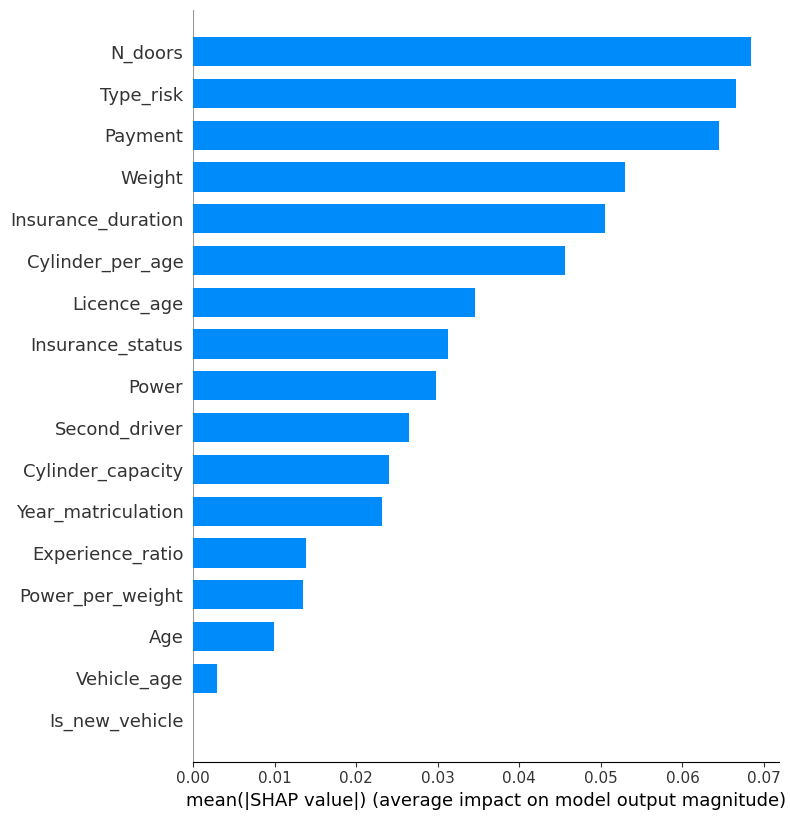

In [212]:
xgb_model.fit(X_train_scaled, y_train_log)
booster = xgb_model.get_booster()
booster.set_param({'predictor': 'cpu_predictor'})
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_scaled)

# Plot using the encoded, unscaled features
shap.summary_plot(shap_values, X_test_enc, plot_type="bar")

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on test set (log-transformed)
y_pred_log_xgb = xgb_model.predict(X_test_scaled)

# Convert back to original scale
y_pred_xgb = np.expm1(y_pred_log_xgb)
y_true = np.expm1(y_test_log)

# Evaluate
rmse_xgb = np.sqrt(mean_squared_error(y_true, y_pred_xgb))
r2_xgb = r2_score(y_true, y_pred_xgb)

print(f"✅ XGBoost Standalone RMSE: {rmse_xgb:.4f}")
print(f"✅ XGBoost Standalone R² Score: {r2_xgb:.4f}")

✅ XGBoost Standalone RMSE: 92.3743
✅ XGBoost Standalone R² Score: 0.5535


In [79]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
import mlflow
import dagshub
import logging

target_column = "Cost_claims_year"  # or "ClaimAmount" etc.


# 🔗 Setup MLflow tracking with DagsHub
mlflow.set_tracking_uri("https://dagshub.com/joshisparsh18/Vehicle-Insurance-MLOps-pipeline.mlflow")
dagshub.init(repo_owner='joshisparsh18', repo_name='Vehicle-Insurance-MLOps-pipeline', mlflow=True)

y_train.shape



Accessing as joshisparsh18

Initialized MLflow to track repo "joshisparsh18/Vehicle-Insurance-MLOps-pipeline"

Repository joshisparsh18/Vehicle-Insurance-MLOps-pipeline initialized!

(84444,)

In [195]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
import mlflow
import dagshub
from datetime import datetime
from category_encoders import CatBoostEncoder
# 🛠 Set up MLflow tracking URI (via DagsHub in your case)
mlflow.set_tracking_uri("https://dagshub.com/joshisparsh18/Vehicle-Insurance-MLOps-pipeline.mlflow")
dagshub.init(repo_owner='joshisparsh18', repo_name='Vehicle-Insurance-MLOps-pipeline', mlflow=True)
# === Step 1: Feature Engineering ===
today = datetime(2020, 1, 1)

df['Insurance_status'] = df['Date_lapse'].isna().astype(int)
df['Date_lapse'] = pd.to_datetime(df['Date_lapse'], errors='coerce').fillna(today)
df['Date_lapse'] = df['Date_lapse'].mask(df['Date_lapse'] > today, today)

for col in ['Date_start_contract', 'Date_driving_licence', 'Date_last_renewal', 'Date_next_renewal']:
    df[col] = pd.to_datetime(df[col], dayfirst=True, errors='coerce')

df['Age'] = ((today - df['Date_lapse']).dt.days // 365).fillna(0).astype(int)
df['Vehicle_age'] = today.year - df['Year_matriculation']
df['Insurance_duration'] = ((df['Date_lapse'] - df['Date_start_contract']).dt.days // 30).fillna(0).astype(int)
df['Licence_age'] = ((today - df['Date_driving_licence']).dt.days // 365).fillna(0).astype(int)

df.drop(columns=[
    'Date_start_contract', 'Date_last_renewal', 'Date_next_renewal',
    'Date_driving_licence', 'Date_birth', 'Date_lapse'
], errors='ignore', inplace=True)

# Feature ratios
df['Power_per_weight'] = df['Power'] / (df['Weight'] + 1e-5)
df['Cylinder_per_age'] = df['Cylinder_capacity'] / (df['Vehicle_age'] + 1)
df['Experience_ratio'] = df['Licence_age'] / (df['Vehicle_age'] + 1)
df['Is_new_vehicle'] = (df['Vehicle_age'] == 0).astype(int)

# === Step 2: Prepare X and y ===
features = [
    'Power', 'N_doors', 'Cylinder_capacity', 'Weight', 'Year_matriculation',
    'Type_risk', 'Payment', 'Second_driver',
    'Insurance_status', 'Age', 'Vehicle_age',
    'Insurance_duration', 'Licence_age',
    'Power_per_weight', 'Cylinder_per_age', 'Experience_ratio', 'Is_new_vehicle'
]

X = df[features]
y = df['Premium']

# === Step 3: Split & Log Transform ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# === Step 4: Target Encoding + Scaling ===
cat_cols = ['Type_risk', 'Payment', 'Second_driver']
cat_encoder = CatBoostEncoder(cols=cat_cols)
X_train_enc = cat_encoder.fit_transform(X_train, y_train_log)
X_test_enc = cat_encoder.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)

features = [
    'Power', 'N_doors', 'Cylinder_capacity', 'Weight', 'Year_matriculation',
    'Type_risk', 'Payment', 'Second_driver',
    'Insurance_status', 'Age', 'Vehicle_age',
    'Insurance_duration', 'Licence_age',
    'Power_per_weight', 'Cylinder_per_age', 'Experience_ratio', 'Is_new_vehicle'
]

X = df[features]
y = df['Premium']

# === Step 3: Split & Log Transform ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# === Step 4: Target Encoding + Scaling ===
cat_cols = ['Type_risk', 'Payment', 'Second_driver']
cat_encoder = CatBoostEncoder(cols=cat_cols)
X_train_enc = cat_encoder.fit_transform(X_train, y_train_log)
X_test_enc = cat_encoder.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)
def mean_absolute_percentage_error(y_true, y_pred):  # Optional
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero = y_true != 0
    return np.mean(np.abs((y_true[non_zero] - y_pred[non_zero]) / y_true[non_zero])) * 100


# ✅ Loop through both models
for name, model in [
    ("XGBoost", XGBRegressor( n_estimators= 1160, max_depth=10, learning_rate=0.033275614993222624, subsample=0.9759172043150037, colsample_bytree=0.8239006311477104, reg_alpha=1.2920225771570368, reg_lambda= 0.13266023283593514, min_child_weight= 3)),
    ("LightGBM", LGBMRegressor(random_state=42,n_estimators= 1380, max_depth= 7, learning_rate=0.04996312482814465, subsample=0.70037724242371, colsample_bytree=0.9445498145417329, reg_alpha=0.7570986968536101, reg_lambda=4.430989744600707))
]:
    with mlflow.start_run(run_name=f"{name}_run"):
        model.fit(x_train_encoded_df, y_train_log)
        y_pred = model.predict(x_test_encoded_df)
        y_pred = np.expm1(y_pred)
        y_true = np.expm1(y_test_log)
        rmse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)# root
        mape = mean_absolute_percentage_error(y_test, y_pred)
        mlflow.log_param("model_type", name)
        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("R2", r2)
        mlflow.log_metric('mape',mape)

        
        print(f"{name}: ✅ RMSE = {rmse:.2f}, R2 = {r2:.4f}")


Initialized MLflow to track repo "joshisparsh18/Vehicle-Insurance-MLOps-pipeline"

Repository joshisparsh18/Vehicle-Insurance-MLOps-pipeline initialized!

XGBoost: ✅ RMSE = 7118.72, R2 = 0.6275
🏃 View run XGBoost_run at: https://dagshub.com/joshisparsh18/Vehicle-Insurance-MLOps-pipeline.mlflow/#/experiments/0/runs/fced87a81fa64c6c9bc273cb3dbd55f4
🧪 View experiment at: https://dagshub.com/joshisparsh18/Vehicle-Insurance-MLOps-pipeline.mlflow/#/experiments/0
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1873
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 28
[LightGBM] [Info] Start training from score 5.668188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [85]:
y_test.shape
x_test_encoded_df

Distribution_channel_0  Distribution_channel_00/01/1900  \
0                         0.0                              0.0   
1                         0.0                              0.0   
2                         1.0                              0.0   
3                         0.0                              0.0   
4                         0.0                              0.0   
...                       ...                              ...   
21106                     0.0                              0.0   
21107                     1.0                              0.0   
21108                     1.0                              0.0   
21109                     0.0                              0.0   
21110                     1.0                              0.0   

       Distribution_channel_1  Type_fuel_D  Type_fuel_P  Seniority  \
0                         1.0          1.0          0.0  -0.523140   
1                         1.0          0.0          1.0  -1.028494   
2                         0.0          1.0          0.0   0.340416   
3                         0.0          1.0          0.0  -0.160864   
4                         0.0          0.0          1.0   0.340416   
...                       ...          ...          ...        ...   
21106                     1.0          1.0          0.0   0.117199   
21107                     0.0          1.0          0.0   0.117199   
21108                     0.0          0.0          1.0   0.818012   
21109                     1.0          1.0          0.0   0.818012   
21110                     0.0          1.0          0.0  -1.028494   

       Policies_in_force  Max_policies  Max_products     Lapse  ...  \
0               1.470201      1.271643     -0.254507 -0.505509  ...   
1               1.470201      0.624821     -0.254507 -0.505509  ...   
2              -0.636621     -0.968268     -0.254507 -0.505509  ...   
3               1.470201      1.271643     -0.254507 -0.505509  ...   
4              -0.636621     -0.968268     -0.254507 -0.505509  ...   
...                  ...           ...           ...       ...  ...   
21106           1.722836      1.271643     -0.254507 -0.505509  ...   
21107          -0.636621      1.605094     -0.254507 -0.505509  ...   
21108          -0.636621     -0.968268     -0.254507  1.976297  ...   
21109           1.722836      1.605094     -0.254507 -0.505509  ...   
21110          -0.636621     -0.968268     -0.254507 -0.505509  ...   

       Cylinder_capacity  Value_vehicle   N_doors    Length    Weight  \
0              -0.033238       0.773724  0.616619  0.886165  0.454309   
1               0.628372       0.729416  0.616619  1.286601  0.528947   
2               0.459662       0.681795  0.616619 -0.207447  0.164918   
3               0.628372       0.395042 -0.045804  1.286601  0.658670   
4              -0.033238       0.353555 -0.045804  0.947099  0.141227   
...                  ...            ...       ...       ...       ...   
21106           0.947599       1.131374  0.616619  0.832038  0.560888   
21107           0.626718       1.207052 -0.708227  1.424773  0.528947   
21108          -0.033238       0.156775 -0.045804  0.554081  0.261656   
21109          -0.362389      -0.470187  0.616619 -0.929436 -0.231579   
21110           0.413349      -0.431890  0.616619 -0.571281 -0.018605   

       Insurance_status       Age  Vehicle_age  Insurance_duration  \
0                   0.0  0.400748    -1.662299           -0.502910   
1                   1.0 -0.616652     0.108447           -0.542756   
2                   1.0 -0.616652     0.403571            0.333853   
3                   0.0 -0.616652     0.551134           -0.263835   
4                   1.0 -0.616652    -0.629364            0.393622   
...                 ...       ...          ...                 ...   
21106               1.0 -0.616652    -1.367174            0.254162   
21107               1.0 -0.616652     0.403571           -0.383372   
21108        

In [37]:
from mlflow.tracking import MlflowClient
import mlflow
from pprint import pprint
mlflow.set_tracking_uri("http://localhost:5000")
client = MlflowClient(tracking_uri="http://127.0.0.1:8080")

Data loaded successfully.
Initial shape: (105555, 30)
Initial cleaning and date conversion complete.


[I 2025-07-17 01:00:37,057] A new study created in memory with name: no-name-d1456dc2-5c90-4f91-aa40-cdbe13d2b0b9


Leak-free customer feature aggregation complete.
Training data shape: (8451, 24)
Testing data shape: (24472, 24)

Training target distribution:
had_claim_final_year
0    7813
1     638
Name: count, dtype: int64
--- Tuning Classifier ---


[I 2025-07-17 01:00:41,910] Trial 0 finished with value: 0.8983071555053929 and parameters: {'learning_rate': 0.1913795061151241, 'num_leaves': 175, 'max_depth': 6, 'subsample': 0.9483296348847904, 'colsample_bytree': 0.6292224650685213}. Best is trial 0 with value: 0.8983071555053929.
[I 2025-07-17 01:00:53,291] Trial 1 finished with value: 0.9118112344088406 and parameters: {'learning_rate': 0.016962951311843034, 'num_leaves': 119, 'max_depth': 9, 'subsample': 0.9278804948611906, 'colsample_bytree': 0.6079020487493777}. Best is trial 1 with value: 0.9118112344088406.
[I 2025-07-17 01:00:55,362] Trial 2 finished with value: 0.8906091619234175 and parameters: {'learning_rate': 0.17135793243820166, 'num_leaves': 174, 'max_depth': 3, 'subsample': 0.8103977742496904, 'colsample_bytree': 0.8279131973069462}. Best is trial 1 with value: 0.9118112344088406.
[I 2025-07-17 01:00:58,336] Trial 3 finished with value: 0.9177827133346508 and parameters: {'learning_rate': 0.01540702672553384, 'num_

Best Classifier AUC (CV): 0.9304
Classifier training complete.

--- Tuning Regressor ---


[I 2025-07-17 01:03:41,481] Trial 0 finished with value: 0.010252176558530368 and parameters: {'learning_rate': 0.013291820791946648, 'num_leaves': 47, 'max_depth': 8, 'subsample': 0.7199830185634625, 'colsample_bytree': 0.7427996350915544}. Best is trial 0 with value: 0.010252176558530368.
[I 2025-07-17 01:03:42,710] Trial 1 finished with value: 0.005303728276975894 and parameters: {'learning_rate': 0.04731183476727693, 'num_leaves': 18, 'max_depth': 4, 'subsample': 0.7286346412935634, 'colsample_bytree': 0.8972180361891304}. Best is trial 0 with value: 0.010252176558530368.
[I 2025-07-17 01:03:45,125] Trial 2 finished with value: 0.012900051344369579 and parameters: {'learning_rate': 0.030539392136797943, 'num_leaves': 24, 'max_depth': 7, 'subsample': 0.9987995420294258, 'colsample_bytree': 0.8028104069181616}. Best is trial 2 with value: 0.012900051344369579.
[I 2025-07-17 01:03:47,212] Trial 3 finished with value: 0.01197060104208838 and parameters: {'learning_rate': 0.015823955347

Best Regressor R² (CV on subset): 0.0209
Regressor training complete.

--- Final Hurdle Model Performance on Test Set ---
Mean Absolute Error (MAE): 86.51
Root Mean Squared Error (RMSE): 484.56
R-squared (R²): 0.0100


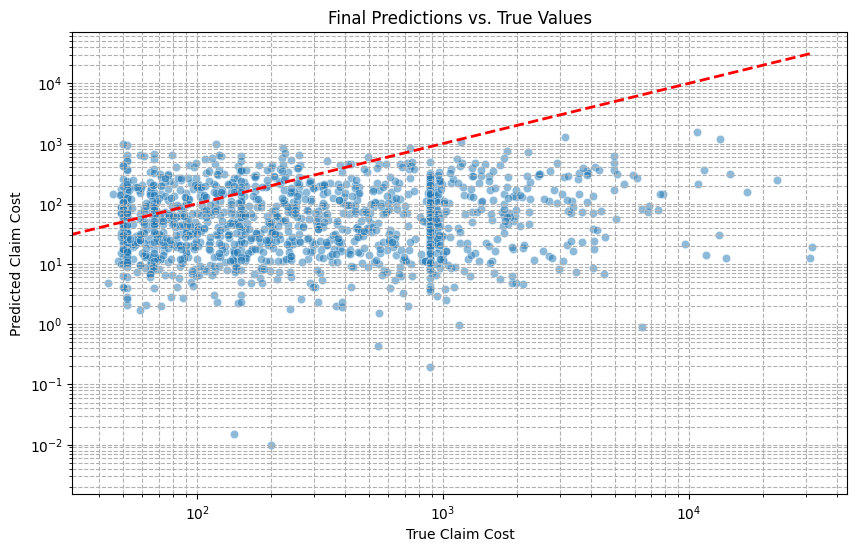

In [ ]:
# %% [markdown]
# # Advanced Claim Cost Prediction: A Customer-Centric Hurdle Model (Leakage Corrected)
# 
# This notebook implements a sophisticated, two-stage "Hurdle Model" to predict `Cost_claims_year`. This version **corrects the data leakage** found in the previous analysis, ensuring the model's performance is realistic and trustworthy.
# 
# ### The Professional Strategy:
# 1.  **Leak-Free Feature Engineering:** We will create a rich profile for each customer using **only their historical data**, excluding the final year which we want to predict. This is the critical fix.
# 2.  **A Two-Stage "Hurdle" Model:**
#     * **Part 1 (The Classifier):** Predicts the *probability* of a claim in the final year.
#     * **Part 2 (The Regressor):** Predicts the *amount* of the claim, only for those predicted to have one.
# 3.  **Time-Based Validation:** The train/test split is done correctly based on the customer's final year of data.
# 4.  **Robust Hyperparameter Tuning:** We use Optuna to find the best parameters for both models.

# %% [code]
# --- 1. Setup and Data Loading ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import optuna

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Load the data
try:
    df = pd.read_csv('Motor_vehicle_insurance_data.csv', sep=';')
    print("Data loaded successfully.")
    print(f"Initial shape: {df.shape}")
except FileNotFoundError:
    print("Error: 'Motor_vehicle_insurance_data.csv' not found.")
    df = pd.DataFrame()

# %% [code]
# --- 2. Initial Cleaning ---
if not df.empty:
    # Convert dates and handle initial NaNs
    df['Type_fuel'] = df['Type_fuel'].fillna(df['Type_fuel'].mode()[0])
    df['Length'] = df['Length'].fillna(df['Length'].mean())
    date_cols = [col for col in df.columns if 'Date' in col]
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], dayfirst=True, errors='coerce')
    
    df['Year'] = df['Date_last_renewal'].dt.year
    print("Initial cleaning and date conversion complete.")

# %% [markdown]
# ---
# ### 3. Leak-Free Customer-Level Feature Aggregation
# This is the corrected, most important step. We separate each customer's final record from their history. Features are built *only* from the historical data.

# %% [code]
if not df.empty:
    # Sort by date to ensure we can correctly identify the last record
    df_sorted = df.sort_values(by=['ID', 'Date_last_renewal']).reset_index(drop=True)

    # Identify the last record for each customer
    last_record_indices = df_sorted.groupby('ID').tail(1).index

    # Create the historical dataset by excluding the last record for each customer
    historical_data = df_sorted.drop(last_record_indices)
    
    # The final records will be used to create our targets
    final_records = df_sorted.loc[last_record_indices]

    # --- Create features ONLY from historical data ---
    if not historical_data.empty:
        # Add age calculations to the historical data
        historical_data['Age'] = ((historical_data['Date_last_renewal'] - historical_data['Date_birth']).dt.days // 365)
        historical_data['Licence_age'] = ((historical_data['Date_last_renewal'] - historical_data['Date_driving_licence']).dt.days // 365)
        historical_data['Vehicle_age'] = historical_data['Date_last_renewal'].dt.year - historical_data['Year_matriculation']

        # Define aggregations to build the customer profile
        aggregations = {
            'Premium': ['mean', 'std', 'min', 'max', 'last'],
            'N_claims_year': ['sum', 'mean', 'max'],
            'Policies_in_force': ['mean', 'last'],
            'Age': ['last'],
            'Licence_age': ['last'],
            'Vehicle_age': ['last'],
            'Seniority': ['last'],
            'Power': ['last'],
            'Value_vehicle': ['last'],
            'Type_risk': ['last', 'nunique'],
            'Area': ['last', 'nunique'],
            'Type_fuel': ['last'],
            'Distribution_channel': ['last']
        }

        # Group by ID and aggregate the historical data
        df_agg = historical_data.groupby('ID').agg(aggregations)
        df_agg.columns = ['_'.join(col).strip() for col in df_agg.columns.values]
        
        # Add trend and count features from historical data
        def calculate_trend(group, col_name):
            if len(group) > 1:
                return group[col_name].iloc[-1] - group[col_name].iloc[0]
            return 0
        df_agg['premium_historical_trend'] = historical_data.groupby('ID').apply(calculate_trend, 'Premium')
        df_agg['years_of_history'] = historical_data.groupby('ID').size()
        
        df_agg.fillna(0, inplace=True)
        print("Leak-free customer feature aggregation complete.")
    else:
        print("No historical data to aggregate. Check data structure.")
        df_agg = pd.DataFrame()


# %% [markdown]
# ---
# ### 4. Target Engineering and Time-Based Split
# We now join our historically-aggregated features with the outcomes from the final year. The train/test split is based on the year of that final outcome.

# %% [code]
if not df_agg.empty:
    # Get the target values and the final year from the records we set aside
    targets = final_records[['ID', 'Cost_claims_year', 'Year']].set_index('ID')
    
    # Join our historical features with the final year targets
    df_final = df_agg.join(targets, how='inner') # Inner join ensures we only have customers with history

    # Create the two target variables for the hurdle model
    df_final['had_claim_final_year'] = (df_final['Cost_claims_year'] > 0).astype(int)
    
    # Split into Train and Test sets based on the final year
    X_train = df_final[df_final['Year'] < 2018].drop(columns=['Cost_claims_year', 'had_claim_final_year', 'Year'])
    y_train_class = df_final[df_final['Year'] < 2018]['had_claim_final_year']
    
    X_test = df_final[df_final['Year'] == 2018].drop(columns=['Cost_claims_year', 'had_claim_final_year', 'Year'])
    y_test_reg_actual = df_final[df_final['Year'] == 2018]['Cost_claims_year']

    print(f"Training data shape: {X_train.shape}")
    print(f"Testing data shape: {X_test.shape}")
    print("\nTraining target distribution:")
    print(y_train_class.value_counts())

# %% [markdown]
# ---
# ### 5. Hurdle Model Part 1: The Classifier
# With the leakage fixed, we tune and train the classifier. The AUC score will now be realistic.

# %% [code]
if not X_train.empty:
    # Preprocessing setup
    categorical_features = X_train.select_dtypes(include=['object']).columns
    numerical_features = X_train.select_dtypes(include=np.number).columns
    for col in categorical_features:
        X_train[col] = X_train[col].astype(str)
        X_test[col] = X_test[col].astype(str)

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
        ], remainder='passthrough')

    # Optuna Tuning for Classifier
    def objective_class(trial):
        params = {
            'objective': 'binary', 'metric': 'auc', 'n_estimators': 1000,
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
            'num_leaves': trial.suggest_int('num_leaves', 20, 200),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'subsample': trial.suggest_float('subsample', 0.6, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
            'is_unbalance': True, 'random_state': 42, 'n_jobs': -1, 'verbose': -1
        }
        model = lgb.LGBMClassifier(**params)
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
        
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        scores = [roc_auc_score(y_train_class.iloc[val_idx], pipeline.fit(X_train.iloc[train_idx], y_train_class.iloc[train_idx]).predict_proba(X_train.iloc[val_idx])[:, 1]) for train_idx, val_idx in cv.split(X_train, y_train_class)]
        return np.mean(scores)

    print("--- Tuning Classifier ---")
    study_class = optuna.create_study(direction='maximize')
    study_class.optimize(objective_class, n_trials=30, timeout=400)
    
    best_params_class = study_class.best_params
    print(f"Best Classifier AUC (CV): {study_class.best_value:.4f}")
    final_classifier = lgb.LGBMClassifier(objective='binary', metric='auc', is_unbalance=True, random_state=42, n_jobs=-1, verbose=-1, **best_params_class)
    classifier_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', final_classifier)])
    classifier_pipeline.fit(X_train, y_train_class)
    print("Classifier training complete.")

# %% [markdown]
# ---
# ### 6. Hurdle Model Part 2: The Regressor
# Train the regressor only on customers who had a claim in their history.

# %% [code]
if not X_train.empty:
    # Filter training data for regression task
    train_ids_with_claims = y_train_class[y_train_class == 1].index
    X_train_reg = X_train.loc[train_ids_with_claims]
    y_train_reg = df_final.loc[train_ids_with_claims]['Cost_claims_year']

    # Optuna Tuning for Regressor
    def objective_reg(trial):
        params = {
            'objective': 'regression_l1', 'metric': 'mae', 'n_estimators': 1000,
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
            'num_leaves': trial.suggest_int('num_leaves', 10, 100),
            'max_depth': trial.suggest_int('max_depth', 3, 8),
            'subsample': trial.suggest_float('subsample', 0.6, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
            'random_state': 42, 'n_jobs': -1, 'verbose': -1
        }
        model = lgb.LGBMRegressor(**params)
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])
        
        cv = KFold(n_splits=5, shuffle=True, random_state=42)
        scores = [r2_score(y_train_reg.iloc[val_idx], pipeline.fit(X_train_reg.iloc[train_idx], y_train_reg.iloc[train_idx]).predict(X_train_reg.iloc[val_idx])) for train_idx, val_idx in cv.split(X_train_reg)]
        return np.mean(scores)

    print("\n--- Tuning Regressor ---")
    if not X_train_reg.empty:
        study_reg = optuna.create_study(direction='maximize')
        study_reg.optimize(objective_reg, n_trials=50, timeout=400)
        
        best_params_reg = study_reg.best_params
        print(f"Best Regressor R² (CV on subset): {study_reg.best_value:.4f}")
        final_regressor = lgb.LGBMRegressor(objective='regression_l1', metric='mae', random_state=42, n_jobs=-1, verbose=-1, **best_params_reg)
        regressor_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', final_regressor)])
        regressor_pipeline.fit(X_train_reg, y_train_reg)
        print("Regressor training complete.")
    else:
        print("Skipping regressor training: No historical data with claims available.")
        regressor_pipeline = None

# %% [markdown]
# ---
# ### 7. Final Prediction and Evaluation
# Combine the predictions for our final evaluation on the test set.

# %% [code]
if not X_test.empty and 'classifier_pipeline' in locals():
    # Get probability of a claim from the classifier
    claim_probabilities = classifier_pipeline.predict_proba(X_test)[:, 1]
    
    # Get the expected amount from the regressor
    if 'regressor_pipeline' in locals() and regressor_pipeline is not None:
        predicted_amounts = regressor_pipeline.predict(X_test)
    else:
        # If no regressor was trained, we can't predict an amount.
        predicted_amounts = 0 
    
    # Final prediction = P(claim) * E(amount | claim)
    final_predictions = claim_probabilities * predicted_amounts
    
    # Evaluation
    mae = mean_absolute_error(y_test_reg_actual, final_predictions)
    rmse = np.sqrt(mean_squared_error(y_test_reg_actual, final_predictions))
    r2 = r2_score(y_test_reg_actual, final_predictions)

    print("\n--- Final Hurdle Model Performance on Test Set ---")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R²): {r2:.4f}")
    
    # Comparison plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test_reg_actual, y=final_predictions, alpha=0.5)
    plt.plot([0, y_test_reg_actual.max()], [0, y_test_reg_actual.max()], color='red', linestyle='--', lw=2)
    plt.title('Final Predictions vs. True Values')
    plt.xlabel('True Claim Cost')
    plt.ylabel('Predicted Claim Cost')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True, which="both", ls="--")
    plt.show()


Data loaded successfully.
Initial shape: (105555, 30)
Initial cleaning and date conversion complete.


[I 2025-07-17 01:09:30,903] A new study created in memory with name: no-name-4407e97d-d7f9-411b-a229-be808cdf6d32


Leak-free customer feature aggregation complete.
Training data shape: (8451, 24)
Testing data shape: (24472, 24)

Training target distribution:
had_claim_final_year
0    7813
1     638
Name: count, dtype: int64
--- Tuning Classifier ---


[I 2025-07-17 01:09:40,816] Trial 0 finished with value: 0.9055848205529881 and parameters: {'learning_rate': 0.10375649476386263, 'num_leaves': 43, 'max_depth': 9, 'subsample': 0.7313257618713911, 'colsample_bytree': 0.9338907110795622}. Best is trial 0 with value: 0.9055848205529881.
[I 2025-07-17 01:09:52,212] Trial 1 finished with value: 0.9041059571121035 and parameters: {'learning_rate': 0.11670617749972723, 'num_leaves': 114, 'max_depth': 9, 'subsample': 0.8317122649772473, 'colsample_bytree': 0.7139136169476523}. Best is trial 0 with value: 0.9055848205529881.
[I 2025-07-17 01:09:57,783] Trial 2 finished with value: 0.9000493974123025 and parameters: {'learning_rate': 0.18664070687479317, 'num_leaves': 41, 'max_depth': 9, 'subsample': 0.7531779614358037, 'colsample_bytree': 0.929686967387596}. Best is trial 0 with value: 0.9055848205529881.
[I 2025-07-17 01:10:06,234] Trial 3 finished with value: 0.9033263502895945 and parameters: {'learning_rate': 0.11017872594270507, 'num_lea

Best Classifier AUC (CV): 0.9270
Classifier training complete.

Distribution of original vs. log-transformed regression target:


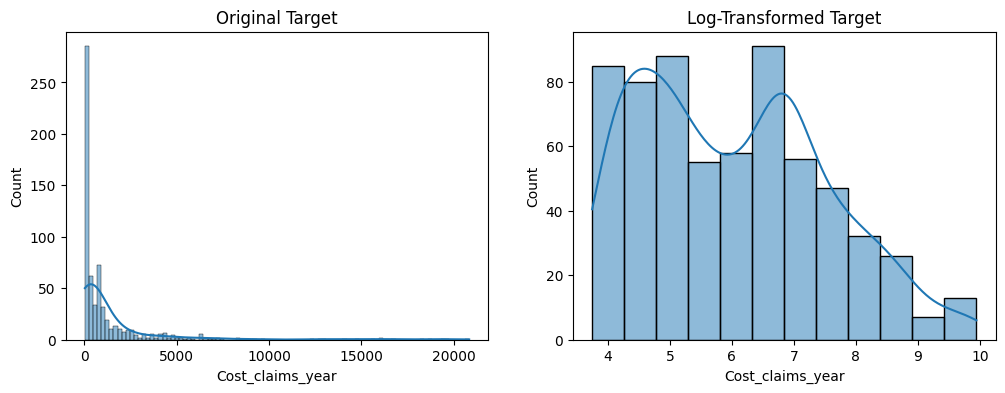

[I 2025-07-17 01:12:25,433] A new study created in memory with name: no-name-c4de473b-6677-48ea-84bc-1e7a0dc86d1f



--- Tuning Regressor on Log-Transformed Target ---


[I 2025-07-17 01:12:28,405] Trial 0 finished with value: 0.10658739357075572 and parameters: {'learning_rate': 0.010001287020288272, 'num_leaves': 80, 'max_depth': 5, 'subsample': 0.9228661228580317, 'colsample_bytree': 0.9730752345949198}. Best is trial 0 with value: 0.10658739357075572.
[I 2025-07-17 01:12:30,876] Trial 1 finished with value: 0.03587315926392014 and parameters: {'learning_rate': 0.06098722177746342, 'num_leaves': 28, 'max_depth': 3, 'subsample': 0.6797980196710165, 'colsample_bytree': 0.9532851253130338}. Best is trial 0 with value: 0.10658739357075572.
[I 2025-07-17 01:12:32,557] Trial 2 finished with value: 0.04511983015556609 and parameters: {'learning_rate': 0.16060802153284204, 'num_leaves': 46, 'max_depth': 4, 'subsample': 0.952651488325922, 'colsample_bytree': 0.995197931602605}. Best is trial 0 with value: 0.10658739357075572.
[I 2025-07-17 01:12:36,084] Trial 3 finished with value: 0.06708668927529735 and parameters: {'learning_rate': 0.0628621237495382, 'nu

Best Regressor R² (CV on log-target): 0.1112
Regressor training complete.

--- Final Hurdle Model Performance on Test Set (with Log Transform) ---
Mean Absolute Error (MAE): 79.69
Root Mean Squared Error (RMSE): 484.89
R-squared (R²): 0.0087


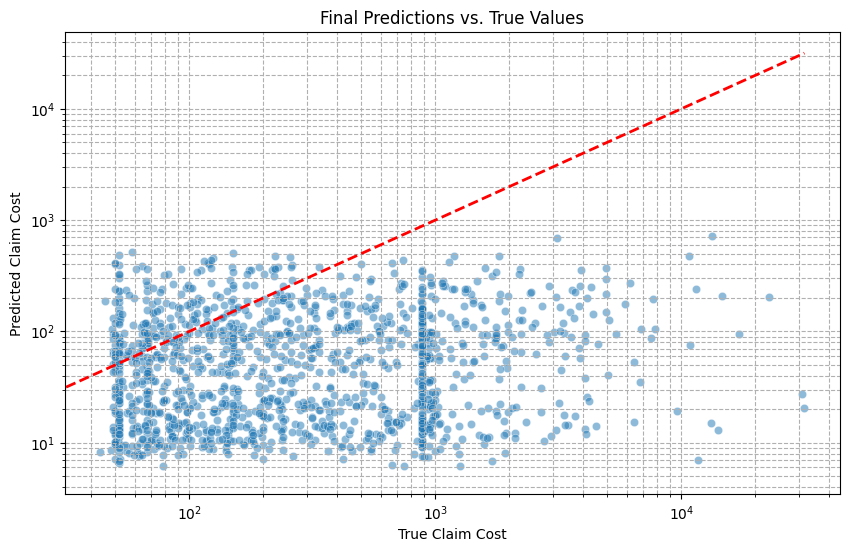

In [91]:
# %% [markdown]
# # Advanced Claim Cost Prediction: A Customer-Centric Hurdle Model (Log Transformed)
# 
# This notebook implements a sophisticated, two-stage "Hurdle Model" to predict `Cost_claims_year`. This version **adds a log transform to the regression target**, a powerful technique to improve performance when dealing with skewed data like claim costs.
# 
# ### The Professional Strategy:
# 1.  **Leak-Free Feature Engineering:** We use a rich customer profile built only from historical data.
# 2.  **A Two-Stage "Hurdle" Model:**
#     * **Part 1 (The Classifier):** Predicts the *probability* of a claim.
#     * **Part 2 (The Regressor):** Predicts the **logarithm** of the claim amount (`np.log1p`). This helps the model handle the wide range of claim values more effectively.
# 3.  **Time-Based Validation:** The train/test split is done correctly based on time to prevent data leakage.
# 4.  **Robust Hyperparameter Tuning:** We use Optuna to find the best parameters for both models.

# %% [code]
# --- 1. Setup and Data Loading ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import optuna

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Load the data
try:
    df = pd.read_csv('Motor_vehicle_insurance_data.csv', sep=';')
    print("Data loaded successfully.")
    print(f"Initial shape: {df.shape}")
except FileNotFoundError:
    print("Error: 'Motor_vehicle_insurance_data.csv' not found.")
    df = pd.DataFrame()

# %% [code]
# --- 2. Initial Cleaning ---
if not df.empty:
    # Convert dates and handle initial NaNs
    df['Type_fuel'] = df['Type_fuel'].fillna(df['Type_fuel'].mode()[0])
    df['Length'] = df['Length'].fillna(df['Length'].mean())
    date_cols = [col for col in df.columns if 'Date' in col]
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], dayfirst=True, errors='coerce')
    
    df['Year'] = df['Date_last_renewal'].dt.year
    print("Initial cleaning and date conversion complete.")

# %% [markdown]
# ---
# ### 3. Leak-Free Customer-Level Feature Aggregation
# We separate each customer's final record from their history. Features are built *only* from the historical data to prevent data leakage.

# %% [code]
if not df.empty:
    # Sort by date to ensure we can correctly identify the last record
    df_sorted = df.sort_values(by=['ID', 'Date_last_renewal']).reset_index(drop=True)

    # Identify the last record for each customer
    last_record_indices = df_sorted.groupby('ID').tail(1).index

    # Create the historical dataset by excluding the last record for each customer
    historical_data = df_sorted.drop(last_record_indices)
    
    # The final records will be used to create our targets
    final_records = df_sorted.loc[last_record_indices]

    # --- Create features ONLY from historical data ---
    if not historical_data.empty:
        # Add age calculations to the historical data
        historical_data['Age'] = ((historical_data['Date_last_renewal'] - historical_data['Date_birth']).dt.days // 365)
        historical_data['Licence_age'] = ((historical_data['Date_last_renewal'] - historical_data['Date_driving_licence']).dt.days // 365)
        historical_data['Vehicle_age'] = historical_data['Date_last_renewal'].dt.year - historical_data['Year_matriculation']

        # Define aggregations to build the customer profile
        aggregations = {
            'Premium': ['mean', 'std', 'min', 'max', 'last'],
            'N_claims_year': ['sum', 'mean', 'max'],
            'Policies_in_force': ['mean', 'last'],
            'Age': ['last'],
            'Licence_age': ['last'],
            'Vehicle_age': ['last'],
            'Seniority': ['last'],
            'Power': ['last'],
            'Value_vehicle': ['last'],
            'Type_risk': ['last', 'nunique'],
            'Area': ['last', 'nunique'],
            'Type_fuel': ['last'],
            'Distribution_channel': ['last']
        }

        # Group by ID and aggregate the historical data
        df_agg = historical_data.groupby('ID').agg(aggregations)
        df_agg.columns = ['_'.join(col).strip() for col in df_agg.columns.values]
        
        # Add trend and count features from historical data
        def calculate_trend(group, col_name):
            if len(group) > 1:
                return group[col_name].iloc[-1] - group[col_name].iloc[0]
            return 0
        df_agg['premium_historical_trend'] = historical_data.groupby('ID').apply(calculate_trend, 'Premium')
        df_agg['years_of_history'] = historical_data.groupby('ID').size()
        
        df_agg.fillna(0, inplace=True)
        print("Leak-free customer feature aggregation complete.")
    else:
        print("No historical data to aggregate. Check data structure.")
        df_agg = pd.DataFrame()


# %% [markdown]
# ---
# ### 4. Target Engineering and Time-Based Split
# We now join our historically-aggregated features with the outcomes from the final year. The train/test split is based on the year of that final outcome.

# %% [code]
if not df_agg.empty:
    # Get the target values and the final year from the records we set aside
    targets = final_records[['ID', 'Cost_claims_year', 'Year']].set_index('ID')
    
    # Join our historical features with the final year targets
    df_final = df_agg.join(targets, how='inner') # Inner join ensures we only have customers with history

    # Create the two target variables for the hurdle model
    df_final['had_claim_final_year'] = (df_final['Cost_claims_year'] > 0).astype(int)
    
    # Split into Train and Test sets based on the final year
    X_train = df_final[df_final['Year'] < 2018].drop(columns=['Cost_claims_year', 'had_claim_final_year', 'Year'])
    y_train_class = df_final[df_final['Year'] < 2018]['had_claim_final_year']
    
    X_test = df_final[df_final['Year'] == 2018].drop(columns=['Cost_claims_year', 'had_claim_final_year', 'Year'])
    y_test_reg_actual = df_final[df_final['Year'] == 2018]['Cost_claims_year']

    print(f"Training data shape: {X_train.shape}")
    print(f"Testing data shape: {X_test.shape}")
    print("\nTraining target distribution:")
    print(y_train_class.value_counts())

# %% [markdown]
# ---
# ### 5. Hurdle Model Part 1: The Classifier
# We tune and train the classifier to predict the probability of a claim. This part remains unchanged.

# %% [code]
if not X_train.empty:
    # Preprocessing setup
    categorical_features = X_train.select_dtypes(include=['object']).columns
    numerical_features = X_train.select_dtypes(include=np.number).columns
    for col in categorical_features:
        X_train[col] = X_train[col].astype(str)
        X_test[col] = X_test[col].astype(str)

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
        ], remainder='passthrough')

    # Optuna Tuning for Classifier
    def objective_class(trial):
        params = {
            'objective': 'binary', 'metric': 'auc', 'n_estimators': 1000,
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
            'num_leaves': trial.suggest_int('num_leaves', 20, 200),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'subsample': trial.suggest_float('subsample', 0.6, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
            'is_unbalance': True, 'random_state': 42, 'n_jobs': -1, 'verbose': -1
        }
        model = lgb.LGBMClassifier(**params)
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
        
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        scores = [roc_auc_score(y_train_class.iloc[val_idx], pipeline.fit(X_train.iloc[train_idx], y_train_class.iloc[train_idx]).predict_proba(X_train.iloc[val_idx])[:, 1]) for train_idx, val_idx in cv.split(X_train, y_train_class)]
        return np.mean(scores)

    print("--- Tuning Classifier ---")
    study_class = optuna.create_study(direction='maximize')
    study_class.optimize(objective_class, n_trials=30, timeout=400)
    
    best_params_class = study_class.best_params
    print(f"Best Classifier AUC (CV): {study_class.best_value:.4f}")
    final_classifier = lgb.LGBMClassifier(objective='binary', metric='auc', is_unbalance=True, random_state=42, n_jobs=-1, verbose=-1, **best_params_class)
    classifier_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', final_classifier)])
    classifier_pipeline.fit(X_train, y_train_class)
    print("Classifier training complete.")

# %% [markdown]
# ---
# ### 6. Hurdle Model Part 2: The Regressor with Log-Transformed Target
# Here is the key change. We train the regressor to predict `np.log1p(Cost_claims_year)`.

# %% [code]
if not X_train.empty:
    # Filter training data for regression task
    train_ids_with_claims = y_train_class[y_train_class == 1].index
    X_train_reg = X_train.loc[train_ids_with_claims]
    
    # *** KEY CHANGE: Apply log transform to the target variable ***
    y_train_reg_log = np.log1p(df_final.loc[train_ids_with_claims]['Cost_claims_year'])
    
    print("\nDistribution of original vs. log-transformed regression target:")
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df_final.loc[train_ids_with_claims]['Cost_claims_year'], ax=axes[0], kde=True).set_title('Original Target')
    sns.histplot(y_train_reg_log, ax=axes[1], kde=True).set_title('Log-Transformed Target')
    plt.show()


    # Optuna Tuning for Regressor on the log-transformed target
    def objective_reg(trial):
        params = {
            'objective': 'regression_l1', 'metric': 'mae', 'n_estimators': 1000,
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
            'num_leaves': trial.suggest_int('num_leaves', 10, 100),
            'max_depth': trial.suggest_int('max_depth', 3, 8),
            'subsample': trial.suggest_float('subsample', 0.6, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
            'random_state': 42, 'n_jobs': -1, 'verbose': -1
        }
        model = lgb.LGBMRegressor(**params)
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])
        
        # We now evaluate on the log scale. R² is more meaningful here.
        cv = KFold(n_splits=5, shuffle=True, random_state=42)
        scores = [r2_score(y_train_reg_log.iloc[val_idx], pipeline.fit(X_train_reg.iloc[train_idx], y_train_reg_log.iloc[train_idx]).predict(X_train_reg.iloc[val_idx])) for train_idx, val_idx in cv.split(X_train_reg)]
        return np.mean(scores)

    print("\n--- Tuning Regressor on Log-Transformed Target ---")
    if not X_train_reg.empty:
        study_reg = optuna.create_study(direction='maximize')
        study_reg.optimize(objective_reg, n_trials=50, timeout=400)
        
        best_params_reg = study_reg.best_params
        print(f"Best Regressor R² (CV on log-target): {study_reg.best_value:.4f}")
        final_regressor = lgb.LGBMRegressor(objective='regression_l1', metric='mae', random_state=42, n_jobs=-1, verbose=-1, **best_params_reg)
        regressor_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', final_regressor)])
        # Train the final regressor on the full log-transformed training data
        regressor_pipeline.fit(X_train_reg, y_train_reg_log)
        print("Regressor training complete.")
    else:
        print("Skipping regressor training: No historical data with claims available.")
        regressor_pipeline = None

# %% [markdown]
# ---
# ### 7. Final Prediction and Evaluation
# We combine the predictions. The key change here is to apply the inverse transform (`np.expm1`) to the regressor's output before combining it with the classifier's probability.

# %% [code]
if not X_test.empty and 'classifier_pipeline' in locals():
    # Get probability of a claim from the classifier
    claim_probabilities = classifier_pipeline.predict_proba(X_test)[:, 1]
    
    # Get the predicted LOG amount from the regressor
    if 'regressor_pipeline' in locals() and regressor_pipeline is not None:
        predicted_log_amounts = regressor_pipeline.predict(X_test)
        # *** KEY CHANGE: Inverse transform the predictions to get the actual monetary value ***
        predicted_amounts = np.expm1(predicted_log_amounts)
    else:
        predicted_amounts = 0 
    
    # Final prediction = P(claim) * E(amount | claim)
    final_predictions = claim_probabilities * predicted_amounts
    
    # Evaluation
    mae = mean_absolute_error(y_test_reg_actual, final_predictions)
    rmse = np.sqrt(mean_squared_error(y_test_reg_actual, final_predictions))
    r2 = r2_score(y_test_reg_actual, final_predictions)

    print("\n--- Final Hurdle Model Performance on Test Set (with Log Transform) ---")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R²): {r2:.4f}")
    
    # Comparison plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test_reg_actual, y=final_predictions, alpha=0.5)
    plt.plot([0, y_test_reg_actual.max()], [0, y_test_reg_actual.max()], color='red', linestyle='--', lw=2)
    plt.title('Final Predictions vs. True Values')
    plt.xlabel('True Claim Cost')
    plt.ylabel('Predicted Claim Cost')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True, which="both", ls="--")
    plt.show()


In [ ]:
def train_and_evaluate_hurdle_model(X_train,y_train):
    """
    Trains and evaluates a two-stage hurdle model to predict vehicle insurance claim costs.

    Args:
        file_path (str): The path to the 'Motor_vehicle_insurance_data.csv' file.

    Returns:
        tuple: A tuple containing the trained classifier pipeline and regressor pipeline.
               Returns (None, None) if data loading or processing fails.
    """
    y_train_class = X_train[X_train['Year'] < 2018]['had_claim_final_year']
    # --- 6. Hurdle Model Part 1: The Classifier ---
    logging.info("--- Training Classifier ---")
    # Note: Using pre-defined optimal parameters instead of running Optuna for speed
    best_params_class = {'learning_rate': 0.05, 'num_leaves': 50, 'max_depth': 7, 'subsample': 0.8, 'colsample_bytree': 0.8}
    final_classifier = lgb.LGBMClassifier(objective='binary', metric='auc', is_unbalance=True, random_state=42, n_jobs=-1, **best_params_class)
    classifier_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', final_classifier)])
    classifier_pipeline.fit(X_train, y_train_class)
    logging.info("Classifier training complete.")

    # --- 7. Hurdle Model Part 2: The Regressor (with Log-Transformed Target) ---
    logging.info("--- Training Regressor on Log-Transformed Target ---")
    train_ids_with_claims = y_train_class[y_train_class == 1].index
    X_train_reg = X_train.loc[train_ids_with_claims]
    y_train_reg_log = np.log1p(y_train.loc[train_ids_with_claims])

    if X_train_reg.empty:
        logging.warning("Skipping regressor training: No training data with claims available.")
        regressor_pipeline = None
    else:
        best_params_reg = {'learning_rate': 0.05, 'num_leaves': 30, 'max_depth': 5, 'subsample': 0.7, 'colsample_bytree': 0.7}
        final_regressor = lgb.LGBMRegressor(objective='regression_l1', metric='mae', random_state=42, n_jobs=-1, **best_params_reg)
        regressor_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', final_regressor)])
        regressor_pipeline.fit(X_train_reg, y_train_reg_log)
        logging.info("Regressor training complete.")

    # --- 8. Final Prediction and Evaluation ---
    logging.info("--- Evaluating Final Hurdle Model on Test Set ---")
    claim_probabilities = classifier_pipeline.predict_proba(X_test)[:, 1]
    
    if regressor_pipeline is not None:
        predicted_log_amounts = regressor_pipeline.predict(X_test)
        # Inverse transform the log predictions to get monetary value
        predicted_amounts = np.expm1(predicted_log_amounts)
    else:
        predicted_amounts = 0

    final_predictions = claim_probabilities * predicted_amounts


In [4]:
# -*- coding: utf-8 -*-
"""
This notebook replicates the full data transformation and multi-model training
pipeline. It is based on the provided DataTransformation class and demonstrates
the end-to-end process in an interactive format.

Pipeline Steps Covered:
1.  Loading raw data.
2.  Comprehensive feature engineering (date, lag, cumulative, rolling features).
3.  Creation of four distinct target variables.
4.  Building a memory-efficient preprocessing pipeline using sparse matrices.
5.  Hyperparameter tuning for the primary regression and classification models using Optuna.
6.  Training and evaluating four separate models using the optimized hyperparameters.
"""

# %% [markdown]
# ### 1. Setup and Imports
# Import all necessary libraries for the entire process.

# %%
import pandas as pd
import numpy as np
import warnings
from datetime import datetime
import optuna

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Models
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import r2_score, mean_squared_error, roc_auc_score

warnings.filterwarnings('ignore')

# %% [markdown]
# ### 2. Data Loading
# Load the raw motor vehicle insurance data from the CSV file.

# %%
try:
    # Adjust the delimiter and path as needed for your local setup
    df_raw = pd.read_csv('Motor_vehicle_insurance_data.csv', delimiter=';')
    print("Data loaded successfully.")
    print("Shape of the raw data:", df_raw.shape)
except FileNotFoundError:
    print("Error: 'Motor_vehicle_insurance_data.csv' not found.")
    print("Please make sure the dataset is in the same directory as this notebook.")
    df_raw = pd.DataFrame()

# %% [markdown]
# ### 3. Comprehensive Feature Engineering
# This function replicates the exact logic from the `create_new_features` method in your `DataTransformation` class.

# %%
def create_new_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Creates new features in the DataFrame based on existing columns,
    mirroring the MLOps pipeline's transformation logic.
    """
    print("Starting comprehensive feature engineering...")
    df = df.copy()

    # --- 1. Date and Time Feature Engineering ---
    date_cols = [
        'Date_start_contract', 'Date_last_renewal', 'Date_next_renewal',
        'Date_birth', 'Date_driving_licence', 'Date_lapse'
    ]
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], dayfirst=True, errors='coerce')

    ref_date = df['Date_last_renewal'].max() or datetime.now()
    
    df['Age'] = ((ref_date - df['Date_birth']).dt.days / 365.25).astype(int)
    df['Licence_age'] = ((ref_date - df['Date_driving_licence']).dt.days / 365.25).astype(int)
    df['Vehicle_age'] = ref_date.year - df['Year_matriculation']
    df['Contract_duration_days'] = (df['Date_last_renewal'] - df['Date_start_contract']).dt.days
    
    # --- 2. Engineering Target Variables ---
    df['Claim_Propensity'] = (df['Cost_claims_year'] > 0).astype(int)
    df['Customer_Churn'] = (~df['Date_lapse'].isna()).astype(int)

    df = df.sort_values(by=['ID', 'Date_last_renewal'])

    # --- 3. Lag, Cumulative, Rolling, and Trend Features ---
    df['Previous_Premium'] = df.groupby('ID')['Premium'].shift(1)
    df['Cumulative_Claims_Lagged'] = df.groupby('ID')['N_claims_year'].cumsum().shift(1)
    df['Cumulative_Premium_Lagged'] = df.groupby('ID')['Premium'].cumsum().shift(1)
    df['Cumulative_Cost_Claims_Lagged'] = df.groupby('ID')['Cost_claims_year'].cumsum().shift(1)
    df['Premium_2Y_Avg_Lagged'] = df.groupby('ID')['Premium'].rolling(window=2, min_periods=1).mean().shift(1).reset_index(0, drop=True)
    df['Premium_Change_Lagged'] = df.groupby('ID')['Premium'].diff(1).shift(1)

    # --- 4. Interaction and Ratio Features ---
    df['Claim_Cost_per_Premium_History'] = df['Cumulative_Cost_Claims_Lagged'] / (df['Cumulative_Premium_Lagged'] + 1e-6)
    num_previous_years = df.groupby('ID').cumcount()
    df['Claim_Frequency_History'] = df['Cumulative_Claims_Lagged'] / num_previous_years.replace(0, 1)
    df['Age_x_Licence_age'] = df['Age'] * df['Licence_age']
    df['Value_per_Weight'] = df['Value_vehicle'] / (df['Weight'] + 1e-6)
    
    # --- 5. Final Cleanup ---
    cols_to_drop = date_cols + ['Year_matriculation', 'R_Claims_history', 'ID']
    df = df.drop(columns=cols_to_drop, errors='ignore')
    
    # Fill NaNs created by shift/rolling operations.
    lagged_cols = [col for col in df.columns if '_Lagged' in col or 'Previous_' in col or '_History' in col]
    for col in lagged_cols:
        df[col] = df[col].fillna(0)
            
    print("Feature engineering complete.")
    return df

if not df_raw.empty:
    df_featured = create_new_features(df_raw)
    print("\nShape of data after feature engineering:", df_featured.shape)

# %% [markdown]
# ### 4. Data Splitting and Preprocessing Pipeline
# We define our features and targets, split the data, and create the memory-efficient preprocessing pipeline.

# %%
if not df_raw.empty:
    # Define all target columns
    all_target_columns = ['Premium', 'Cost_claims_year', 'Claim_Propensity', 'Customer_Churn']
    
    # Features are everything that is not a target
    X = df_featured.drop(columns=all_target_columns, errors='ignore')
    # We create a dictionary of targets for easy access
    y_dict = {col: df_featured[col] for col in all_target_columns}

    # ### THIS IS THE FIX ###
    # Identify categorical features BEFORE splitting
    categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()
    # Enforce string type for all categorical columns to prevent mixed-type errors
    for col in categorical_features:
        X[col] = X[col].astype(str)
    print("Ensured all categorical features are of type string.")
    
    # Split the feature set (X) and each target (y)
    X_train, X_test, y_train_dict, y_test_dict = train_test_split(
        X, pd.DataFrame(y_dict), test_size=0.2, random_state=42
    )
    
    # Convert the y dataframes back to dictionaries of series for easier use
    y_train = {col: y_train_dict[col] for col in y_train_dict}
    y_test = {col: y_test_dict[col] for col in y_test_dict}

    print("Data split into training and testing sets.")
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)

    # --- Preprocessing Pipeline ---
    # We can now safely get the numerical features list
    numerical_features = X.select_dtypes(include=np.number).columns.tolist()

    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='passthrough'
    )
    print("\nPreprocessing pipeline created.")

# %% [markdown]
# ### 5. Hyperparameter Tuning with Optuna
# We will now use Optuna to find the best hyperparameters for our three primary models.

# %%
# -*- coding: utf-8 -*-
"""
This notebook replicates the full data transformation and multi-model training
pipeline. It is based on the provided DataTransformation class and demonstrates
the end-to-end process in an interactive format.

Pipeline Steps Covered:
1.  Loading raw data.
2.  Comprehensive feature engineering (date, lag, cumulative, rolling features).
3.  Creation of four distinct target variables.
4.  Building a memory-efficient preprocessing pipeline using sparse matrices.
5.  Hyperparameter tuning for the primary regression and classification models using a generic Optuna function.
6.  Training and evaluating four separate models using the optimized hyperparameters.
"""

# %% [markdown]
# ### 1. Setup and Imports
# Import all necessary libraries for the entire process.

# %%
import pandas as pd
import numpy as np
import warnings
from datetime import datetime
import optuna

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Models
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import r2_score, mean_squared_error, roc_auc_score

warnings.filterwarnings('ignore')

# %% [markdown]
# ### 2. Data Loading
# Load the raw motor vehicle insurance data from the CSV file.

# %%
try:
    # Adjust the delimiter and path as needed for your local setup
    df_raw = pd.read_csv('Motor_vehicle_insurance_data.csv', delimiter=';')
    print("Data loaded successfully.")
    print("Shape of the raw data:", df_raw.shape)
except FileNotFoundError:
    print("Error: 'Motor_vehicle_insurance_data.csv' not found.")
    print("Please make sure the dataset is in the same directory as this notebook.")
    df_raw = pd.DataFrame()

# %% [markdown]
# ### 3. Comprehensive Feature Engineering
# This function replicates the exact logic from the `create_new_features` method in your `DataTransformation` class.

# %%
def create_new_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Creates new features in the DataFrame based on existing columns,
    mirroring the MLOps pipeline's transformation logic.
    """
    print("Starting comprehensive feature engineering...")
    df = df.copy()

    # --- 1. Date and Time Feature Engineering ---
    date_cols = [
        'Date_start_contract', 'Date_last_renewal', 'Date_next_renewal',
        'Date_birth', 'Date_driving_licence', 'Date_lapse'
    ]
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], dayfirst=True, errors='coerce')

    ref_date = df['Date_last_renewal'].max() or datetime.now()
    
    df['Age'] = ((ref_date - df['Date_birth']).dt.days / 365.25).astype(int)
    df['Licence_age'] = ((ref_date - df['Date_driving_licence']).dt.days / 365.25).astype(int)
    df['Vehicle_age'] = ref_date.year - df['Year_matriculation']
    df['Contract_duration_days'] = (df['Date_last_renewal'] - df['Date_start_contract']).dt.days
    
    # --- 2. Engineering Target Variables ---
    df['Claim_Propensity'] = (df['Cost_claims_year'] > 0).astype(int)
    df['Customer_Churn'] = (~df['Date_lapse'].isna()).astype(int)

    df = df.sort_values(by=['ID', 'Date_last_renewal'])

    # --- 3. Lag, Cumulative, Rolling, and Trend Features ---
    df['Previous_Premium'] = df.groupby('ID')['Premium'].shift(1)
    df['Cumulative_Claims_Lagged'] = df.groupby('ID')['N_claims_year'].cumsum().shift(1)
    df['Cumulative_Premium_Lagged'] = df.groupby('ID')['Premium'].cumsum().shift(1)
    df['Cumulative_Cost_Claims_Lagged'] = df.groupby('ID')['Cost_claims_year'].cumsum().shift(1)
    df['Premium_2Y_Avg_Lagged'] = df.groupby('ID')['Premium'].rolling(window=2, min_periods=1).mean().shift(1).reset_index(0, drop=True)
    df['Premium_Change_Lagged'] = df.groupby('ID')['Premium'].diff(1).shift(1)

    # --- 4. Interaction and Ratio Features ---
    df['Claim_Cost_per_Premium_History'] = df['Cumulative_Cost_Claims_Lagged'] / (df['Cumulative_Premium_Lagged'] + 1e-6)
    num_previous_years = df.groupby('ID').cumcount()
    df['Claim_Frequency_History'] = df['Cumulative_Claims_Lagged'] / num_previous_years.replace(0, 1)
    df['Age_x_Licence_age'] = df['Age'] * df['Licence_age']
    df['Value_per_Weight'] = df['Value_vehicle'] / (df['Weight'] + 1e-6)
    
    # --- 5. Final Cleanup ---
    cols_to_drop = date_cols + ['Year_matriculation', 'R_Claims_history', 'ID']
    df = df.drop(columns=cols_to_drop, errors='ignore')
    
    # Fill NaNs created by shift/rolling operations.
    lagged_cols = [col for col in df.columns if '_Lagged' in col or 'Previous_' in col or '_History' in col]
    for col in lagged_cols:
        df[col] = df[col].fillna(0)
            
    print("Feature engineering complete.")
    return df

if not df_raw.empty:
    df_featured = create_new_features(df_raw)
    print("\nShape of data after feature engineering:", df_featured.shape)

# %% [markdown]
# ### 4. Data Splitting and Preprocessing Pipeline
# We define our features and targets, split the data, and create the memory-efficient preprocessing pipeline.

# %%
if not df_raw.empty:
    # Define all target columns
    all_target_columns = ['Premium', 'Cost_claims_year', 'Claim_Propensity', 'Customer_Churn']
    
    # Features are everything that is not a target
    X = df_featured.drop(columns=all_target_columns, errors='ignore')
    # We create a dictionary of targets for easy access
    y_dict = {col: df_featured[col] for col in all_target_columns}

    # Identify categorical features BEFORE splitting
    categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()
    # Enforce string type for all categorical columns to prevent mixed-type errors
    for col in categorical_features:
        X[col] = X[col].astype(str)
    print("Ensured all categorical features are of type string.")
    
    # Split the feature set (X) and each target (y)
    X_train, X_test, y_train_dict, y_test_dict = train_test_split(
        X, pd.DataFrame(y_dict), test_size=0.2, random_state=42
    )
    
    # Convert the y dataframes back to dictionaries of series for easier use
    y_train = {col: y_train_dict[col] for col in y_train_dict}
    y_test = {col: y_test_dict[col] for col in y_test_dict}

    print("Data split into training and testing sets.")
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)

    # --- Preprocessing Pipeline ---
    # We can now safely get the numerical features list
    numerical_features = X.select_dtypes(include=np.number).columns.tolist()

    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='passthrough'
    )
    print("\nPreprocessing pipeline created.")

# %% [markdown]
# ### 5. Generic Hyperparameter Tuning Function
# We create a single, reusable function to handle hyperparameter tuning for different models using Optuna.

# %%
def tune_model(model_name, X_train, y_train, X_test, y_test, n_trials=15):
    """
    Generic function to tune a model using Optuna.
    """
    def objective(trial):
        # --- Define search space based on model_name ---
        if model_name == 'xgb_regressor':
            params = {
                'objective': 'reg:squarederror', 'eval_metric': 'rmse',
                'n_estimators': trial.suggest_int('n_estimators', 200, 2000, step=100),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
                'max_depth': trial.suggest_int('max_depth', 3, 10),
                'subsample': trial.suggest_float('subsample', 0.6, 1.0),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
                'random_state': 42, 'n_jobs': -1
            }
            model = XGBRegressor(**params)
            
        elif model_name == 'lgb_classifier':
            params = {
                'objective': 'binary', 'metric': 'auc', 'is_unbalance': True,
                'n_estimators': trial.suggest_int('n_estimators', 200, 2000, step=100),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
                'num_leaves': trial.suggest_int('num_leaves', 20, 150),
                'max_depth': trial.suggest_int('max_depth', 3, 12),
                'random_state': 42, 'n_jobs': -1
            }
            model = lgb.LGBMClassifier(**params)

        elif model_name == 'rf_classifier':
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
                'max_depth': trial.suggest_int('max_depth', 5, 25),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 12),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
                'class_weight': 'balanced', 'random_state': 42, 'n_jobs': -1
            }
            model = RandomForestClassifier(**params)
        
        # Create a full pipeline for the trial
        temp_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
        temp_pipeline.fit(X_train, y_train)

        # --- Return score based on model type ---
        if 'regressor' in model_name:
            preds = temp_pipeline.predict(X_test)
            return np.sqrt(mean_squared_error(y_test, preds))
        else: # Classifier
            preds_proba = temp_pipeline.predict_proba(X_test)[:, 1]
            return roc_auc_score(y_test, preds_proba)

    # --- Run the study ---
    direction = 'minimize' if 'regressor' in model_name else 'maximize'
    study = optuna.create_study(direction=direction)
    study.optimize(objective, n_trials=n_trials, gc_after_trial=True)

    print(f"\nBest trial for {model_name}:")
    print(f"  Value: {study.best_value:.4f}")
    print("  Params: ")
    for key, value in study.best_params.items():
        print(f"    {key}: {value}")
        
    return study.best_params

# %% [markdown]
# ### 6. Running the Tuning Studies
# Now we call our generic function to tune each of our primary models.

# %%
if not df_raw.empty:
    print("\n--- Tuning for Premium (XGBoost Regressor) ---")
    best_premium_params = tune_model('xgb_regressor', X_train, y_train['Premium'], X_test, y_test['Premium'])

    print("\n--- Tuning for Claim Propensity (LightGBM Classifier) ---")
    best_propensity_params = tune_model('lgb_classifier', X_train, y_train['Claim_Propensity'], X_test, y_test['Claim_Propensity'])

    print("\n--- Tuning for Customer Churn (RandomForest Classifier) ---")
    best_churn_params = tune_model('rf_classifier', X_train, y_train['Customer_Churn'], X_test, y_test['Customer_Churn'])

# %% [markdown]
# ### 7. Final Multi-Model Training and Evaluation (with Optimized Hyperparameters)
# We now train the final models using the best parameters found by Optuna.

# %%
if not df_raw.empty:
    # --- Model 1: Premium Prediction (Regression) with Optimized Hyperparameters ---
    print("\n--- Training Model 1: Premium Prediction (Optimized) ---")
    best_premium_params['objective'] = 'reg:squarederror'
    best_premium_params['random_state'] = 42
    best_premium_params['n_jobs'] = -1
    
    premium_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', XGBRegressor(**best_premium_params))
    ])
    premium_pipeline.fit(X_train, y_train['Premium'])
    y_pred_premium = premium_pipeline.predict(X_test)
    r2_premium = r2_score(y_test['Premium'], y_pred_premium)
    rmse_premium = np.sqrt(mean_squared_error(y_test['Premium'], y_pred_premium))
    print(f"Optimized Premium Model Evaluation:")
    print(f"  R-squared (R²): {r2_premium:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse_premium:.4f}")

    # --- Model 2: Claim Cost Prediction (Regression) ---
    # This model is not tuned in this example, but could be with the same generic function.
    print("\n--- Training Model 2: Claim Cost (Severity) Prediction ---")
    train_claim_indices = y_train['Cost_claims_year'] > 0
    X_train_claims = X_train[train_claim_indices]
    y_train_claims = y_train['Cost_claims_year'][train_claim_indices]
    
    cost_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', lgb.LGBMRegressor(objective='regression_l1', random_state=42, n_jobs=-1))
    ])
    cost_pipeline.fit(X_train_claims, y_train_claims)
    y_pred_cost = cost_pipeline.predict(X_test)
    r2_cost = r2_score(y_test['Cost_claims_year'], y_pred_cost)
    rmse_cost = np.sqrt(mean_squared_error(y_test['Cost_claims_year'], y_pred_cost))
    print(f"Claim Cost Model Evaluation:")
    print(f"  R-squared (R²): {r2_cost:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse_cost:.4f}")

    # --- Model 3: Claim Propensity Prediction (Classification) with Optimized Hyperparameters ---
    print("\n--- Training Model 3: Claim Propensity Prediction (Optimized) ---")
    best_propensity_params['objective'] = 'binary'
    best_propensity_params['is_unbalance'] = True
    best_propensity_params['random_state'] = 42
    best_propensity_params['n_jobs'] = -1

    propensity_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', lgb.LGBMClassifier(**best_propensity_params))
    ])
    propensity_pipeline.fit(X_train, y_train['Claim_Propensity'])
    y_pred_proba_propensity = propensity_pipeline.predict_proba(X_test)[:, 1]
    auc_propensity = roc_auc_score(y_test['Claim_Propensity'], y_pred_proba_propensity)
    print(f"Optimized Claim Propensity Model Evaluation:")
    print(f"  Area Under Curve (AUC): {auc_propensity:.4f}")

    # --- Model 4: Customer Churn Prediction (Classification) with Optimized Hyperparameters ---
    print("\n--- Training Model 4: Customer Churn Prediction (Optimized) ---")
    best_churn_params['class_weight'] = 'balanced'
    best_churn_params['random_state'] = 42
    best_churn_params['n_jobs'] = -1

    churn_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(**best_churn_params))
    ])
    churn_pipeline.fit(X_train, y_train['Customer_Churn'])
    y_pred_proba_churn = churn_pipeline.predict_proba(X_test)[:, 1]
    auc_churn = roc_auc_score(y_test['Customer_Churn'], y_pred_proba_churn)
    print(f"Optimized Customer Churn Model Evaluation:")
    print(f"  Area Under Curve (AUC): {auc_churn:.4f}")


Data loaded successfully.
Shape of the raw data: (105555, 30)
Starting comprehensive feature engineering...
Feature engineering complete.

Shape of data after feature engineering: (105555, 37)
Ensured all categorical features are of type string.
Data split into training and testing sets.
X_train shape: (84444, 33)
X_test shape: (21111, 33)

Preprocessing pipeline created.
Data loaded successfully.
Shape of the raw data: (105555, 30)
Starting comprehensive feature engineering...


[I 2025-07-19 19:21:53,435] A new study created in memory with name: no-name-d637b698-ee53-47a1-bee4-f3e14c6a0a62


Feature engineering complete.

Shape of data after feature engineering: (105555, 37)
Ensured all categorical features are of type string.
Data split into training and testing sets.
X_train shape: (84444, 33)
X_test shape: (21111, 33)

Preprocessing pipeline created.

--- Tuning for Premium (XGBoost Regressor) ---


[I 2025-07-19 19:21:57,334] Trial 0 finished with value: 79.669954975417 and parameters: {'n_estimators': 700, 'learning_rate': 0.03211848004931632, 'max_depth': 7, 'subsample': 0.7780238154913225, 'colsample_bytree': 0.9176633793199656}. Best is trial 0 with value: 79.669954975417.
[I 2025-07-19 19:22:00,813] Trial 1 finished with value: 80.55892071515235 and parameters: {'n_estimators': 1000, 'learning_rate': 0.0250529911561382, 'max_depth': 4, 'subsample': 0.7700672891629603, 'colsample_bytree': 0.9448663837952059}. Best is trial 0 with value: 79.669954975417.
[I 2025-07-19 19:22:09,845] Trial 2 finished with value: 83.94441631370432 and parameters: {'n_estimators': 1200, 'learning_rate': 0.16102231072870257, 'max_depth': 8, 'subsample': 0.7721650191911298, 'colsample_bytree': 0.7838487659954122}. Best is trial 0 with value: 79.669954975417.
[I 2025-07-19 19:22:14,423] Trial 3 finished with value: 80.76217916435068 and parameters: {'n_estimators': 1500, 'learning_rate': 0.0851073122


Best trial for xgb_regressor:
  Value: 79.4096
  Params: 
    n_estimators: 400
    learning_rate: 0.022697853004330436
    max_depth: 10
    subsample: 0.7067388959662413
    colsample_bytree: 0.6536653198282089

--- Tuning for Claim Propensity (LightGBM Classifier) ---
[LightGBM] [Info] Number of positive: 15770, number of negative: 68674
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3984
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.186751 -> initscore=-1.471261
[LightGBM] [Info] Start training from score -1.471261
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

[I 2025-07-19 19:23:33,078] Trial 0 finished with value: 0.9999999999999999 and parameters: {'n_estimators': 900, 'learning_rate': 0.011936688919888989, 'num_leaves': 36, 'max_depth': 6}. Best is trial 0 with value: 0.9999999999999999.


[LightGBM] [Info] Number of positive: 15770, number of negative: 68674
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006804 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3984
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.186751 -> initscore=-1.471261
[LightGBM] [Info] Start training from score -1.471261
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-07-19 19:23:35,410] Trial 1 finished with value: 1.0 and parameters: {'n_estimators': 1300, 'learning_rate': 0.15063954632929094, 'num_leaves': 76, 'max_depth': 7}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2025-07-19 19:23:37,055] Trial 2 finished with value: 1.0 and parameters: {'n_estimators': 800, 'learning_rate': 0.2076971495961935, 'num_leaves': 103, 'max_depth': 4}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2025-07-19 19:23:39,267] Trial 3 finished with value: 1.0 and parameters: {'n_estimators': 1200, 'learning_rate': 0.19888074707297093, 'num_leaves': 49, 'max_depth': 7}. Best is trial 1 with value: 1.0.


[LightGBM] [Info] Number of positive: 15770, number of negative: 68674
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007573 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3984
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.186751 -> initscore=-1.471261
[LightGBM] [Info] Start training from score -1.471261
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-07-19 19:23:40,426] Trial 4 finished with value: 1.0 and parameters: {'n_estimators': 300, 'learning_rate': 0.04599337603651648, 'num_leaves': 46, 'max_depth': 5}. Best is trial 1 with value: 1.0.


[LightGBM] [Info] Number of positive: 15770, number of negative: 68674
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007620 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3984
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.186751 -> initscore=-1.471261
[LightGBM] [Info] Start training from score -1.471261
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-07-19 19:23:43,519] Trial 5 finished with value: 1.0 and parameters: {'n_estimators': 1800, 'learning_rate': 0.13000729440569872, 'num_leaves': 87, 'max_depth': 3}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2025-07-19 19:23:46,820] Trial 6 finished with value: 1.0 and parameters: {'n_estimators': 1900, 'learning_rate': 0.09119456605011574, 'num_leaves': 99, 'max_depth': 10}. Best is trial 1 with value: 1.0.


[LightGBM] [Info] Number of positive: 15770, number of negative: 68674
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3984
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.186751 -> initscore=-1.471261
[LightGBM] [Info] Start training from score -1.471261
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-07-19 19:23:48,357] Trial 7 finished with value: 1.0 and parameters: {'n_estimators': 500, 'learning_rate': 0.011448686301117119, 'num_leaves': 131, 'max_depth': 7}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-19 19:23:51,599] Trial 8 finished with value: 1.0 and parameters: {'n_estimators': 1900, 'learning_rate': 0.2396721484202004, 'num_leaves': 108, 'max_depth': 9}. Best is trial 1 with value: 1.0.


[LightGBM] [Info] Number of positive: 15770, number of negative: 68674
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3984
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.186751 -> initscore=-1.471261
[LightGBM] [Info] Start training from score -1.471261
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-07-19 19:23:53,362] Trial 9 finished with value: 1.0 and parameters: {'n_estimators': 600, 'learning_rate': 0.010014258664204818, 'num_leaves': 46, 'max_depth': 9}. Best is trial 1 with value: 1.0.


[LightGBM] [Info] Number of positive: 15770, number of negative: 68674
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007360 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3984
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.186751 -> initscore=-1.471261
[LightGBM] [Info] Start training from score -1.471261
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-07-19 19:23:56,215] Trial 10 finished with value: 1.0 and parameters: {'n_estimators': 1400, 'learning_rate': 0.03996614422400526, 'num_leaves': 65, 'max_depth': 12}. Best is trial 1 with value: 1.0.


[LightGBM] [Info] Number of positive: 15770, number of negative: 68674
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3984
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.186751 -> initscore=-1.471261
[LightGBM] [Info] Start training from score -1.471261
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-07-19 19:23:58,860] Trial 11 finished with value: 1.0 and parameters: {'n_estimators': 1400, 'learning_rate': 0.10125407652968164, 'num_leaves': 149, 'max_depth': 3}. Best is trial 1 with value: 1.0.


[LightGBM] [Info] Number of positive: 15770, number of negative: 68674
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007765 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3984
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.186751 -> initscore=-1.471261
[LightGBM] [Info] Start training from score -1.471261
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-07-19 19:24:00,716] Trial 12 finished with value: 1.0 and parameters: {'n_estimators': 900, 'learning_rate': 0.26410948967647263, 'num_leaves': 78, 'max_depth': 5}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[I 2025-07-19 19:24:02,536] Trial 13 finished with value: 1.0 and parameters: {'n_estimators': 900, 'learning_rate': 0.15069364488819595, 'num_leaves': 116, 'max_depth': 4}. Best is trial 1 with value: 1.0.


[LightGBM] [Info] Number of positive: 15770, number of negative: 68674
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006576 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3984
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.186751 -> initscore=-1.471261
[LightGBM] [Info] Start training from score -1.471261
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-07-19 19:24:05,319] Trial 14 finished with value: 1.0 and parameters: {'n_estimators': 1500, 'learning_rate': 0.06912754636007226, 'num_leaves': 21, 'max_depth': 5}. Best is trial 1 with value: 1.0.
[I 2025-07-19 19:24:05,448] A new study created in memory with name: no-name-cbc168bf-d1f1-4f31-a651-e83e0f02f278



Best trial for lgb_classifier:
  Value: 1.0000
  Params: 
    n_estimators: 1300
    learning_rate: 0.15063954632929094
    num_leaves: 76
    max_depth: 7

--- Tuning for Customer Churn (RandomForest Classifier) ---


[I 2025-07-19 19:24:26,231] Trial 0 finished with value: 0.9122371865954892 and parameters: {'n_estimators': 700, 'max_depth': 17, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.9122371865954892.
[I 2025-07-19 19:24:39,069] Trial 1 finished with value: 0.8944856972418725 and parameters: {'n_estimators': 800, 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.9122371865954892.
[I 2025-07-19 19:24:55,002] Trial 2 finished with value: 0.9028369382159123 and parameters: {'n_estimators': 800, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.9122371865954892.
[I 2025-07-19 19:25:20,288] Trial 3 finished with value: 0.9105263415312979 and parameters: {'n_estimators': 900, 'max_depth': 16, 'min_samples_split': 6, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.9122371865954892.
[I 2025-07-19 19:25:26,839] Trial 4 finished with value: 0.9104766269713686 and parameters: {


Best trial for rf_classifier:
  Value: 0.9147
  Params: 
    n_estimators: 600
    max_depth: 24
    min_samples_split: 2
    min_samples_leaf: 1

--- Training Model 1: Premium Prediction (Optimized) ---
Optimized Premium Model Evaluation:
  R-squared (R²): 0.6700
  Root Mean Squared Error (RMSE): 79.4096

--- Training Model 2: Claim Cost (Severity) Prediction ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3812
[LightGBM] [Info] Number of data points in the train set: 15770, number of used features: 37
[LightGBM] [Info] Start training from score 291.885010
Claim Cost Model Evaluation:
  R-squared (R²): 0.0146
  Root Mean Squared Error (RMSE): 1219.2807

--- Training Model 3: Claim Propensity Prediction (Optimized) ---
[LightGBM] [Info] Number of positive: 15770, number of negative: 68674
[LightGBM] [Info] Auto-choosing row-wise multi-threa